# Assignment - Advanced Regression

### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The company is looking at prospective properties to buy to enter the market. 

The company wants to know:

           Which variables are significant in predicting the price of a house, and
           How well those variables describe the price of a house.

### Business Goal:

A model is required which determines the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Technical Requirements:

● Data contains 1460 entries each having 81 variables.

● Data contains Null values. We need to treat them using domain knowledge and your own understanding.

● Extensive EDA has to be performed to gain relationships of important variables and price.

● Data contains numerical as well as categorical variables. We need to handle them accordingly.

● We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

● We need to find important features which affect the price positively or negatively.


### Load required libraries

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Load dataset

In [307]:
data = pd.read_csv("C:\\Users\\sneha.bajaj\\Downloads\\assign2\\train.csv")

In [308]:
# Glance at data
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Understanding Dataset

In [309]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [310]:
# Change the data type from Integer to object as per definition in data dictionary
data['MSSubClass']=data['MSSubClass'].astype('object')  #Identifies the type of dwelling involved in the sale
data['OverallQual']=data['OverallQual'].astype('object') #Rates the overall material and finish of the house
data['OverallCond']=data['OverallCond'].astype('object') #Rates the overall condition of the house


In [311]:
#Removing ID columns as it has unique values and doesnot contribute in the model
data.drop('Id',axis=1,inplace=True)
data.shape

(1460, 80)

In [312]:
# List of integer & float i.e. numerical data columns and creating numerical data frame
numerical_df = data.select_dtypes (include=['int64','float64'])
list(numerical_df)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [313]:
# Creating categorical columns dataframe
categorical_df = data.select_dtypes (include=['object'])
list(categorical_df)

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [314]:
#Shape of data to determine number of rows and columns
data.shape

(1460, 80)

1460 rows and 81 columns are present in the dataset, after removing Id column 80 columns remain

### Outlier Detection & Treatment

In [315]:
# Checking for outliers in the numerical variables of the data
outliers_percentage={}

for feature in numerical_df.columns:
    IQR=numerical_df[feature].quantile(.75)-numerical_df[feature].quantile(.25)
    outliers_count=numerical_df[(numerical_df[feature]>(numerical_df[feature].quantile(.75)+1.5*IQR)) | (numerical_df[feature]<(numerical_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numerical_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
26,EnclosedPorch,14.25
6,BsmtFinSF2,11.44
28,ScreenPorch,7.95
4,MasVnrArea,6.58
0,LotFrontage,6.03
14,BsmtHalfBath,5.62
25,OpenPorchSF,5.27
1,LotArea,4.73
18,KitchenAbvGr,4.66
33,SalePrice,4.18


Observation:

Majority of the numeric features have outliers
Dropping all the outliers will cause loss of information.

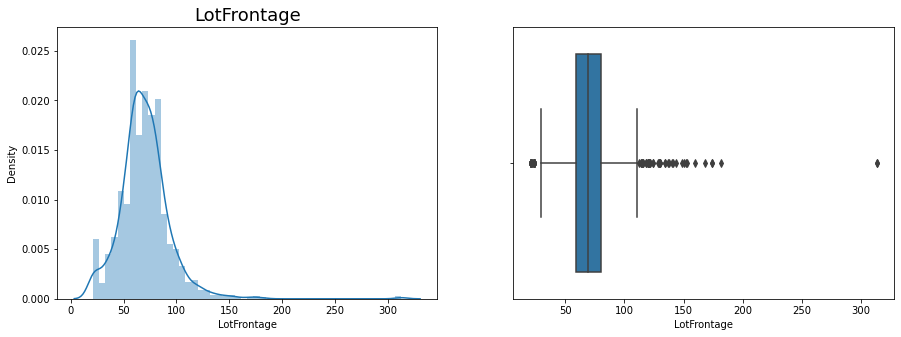

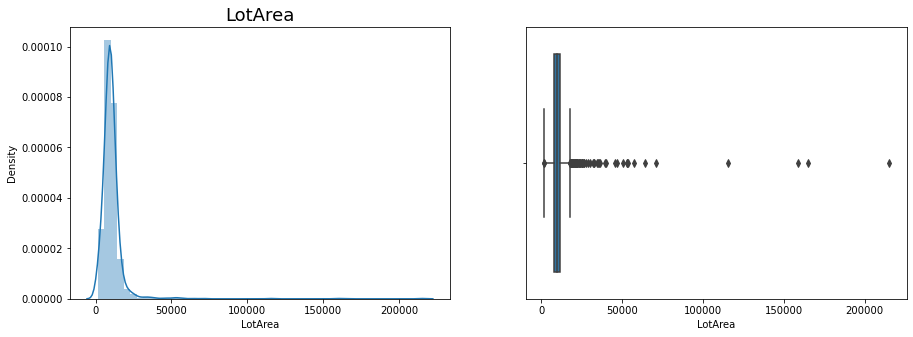

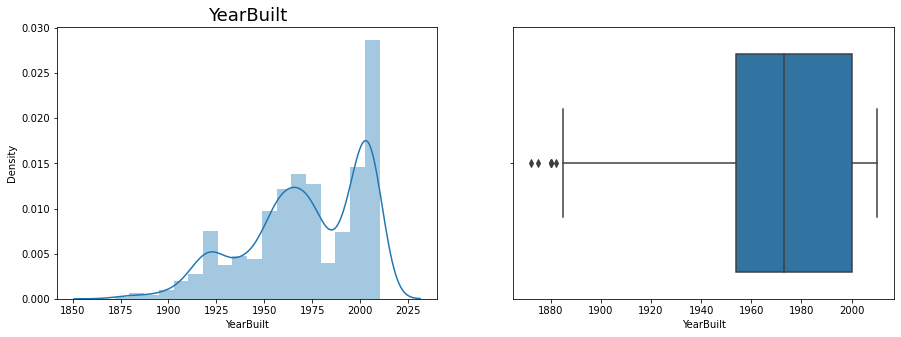

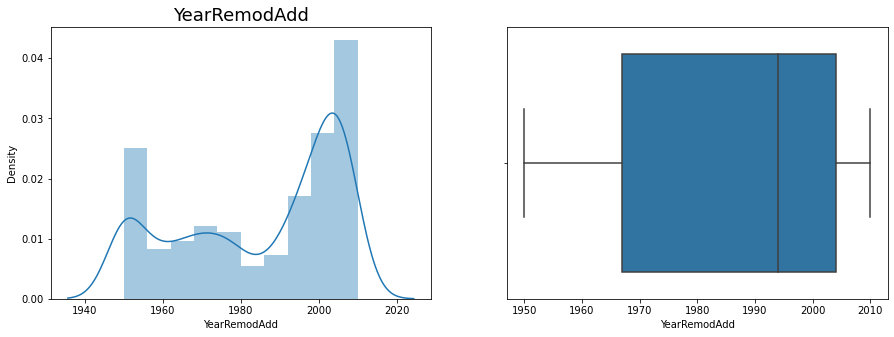

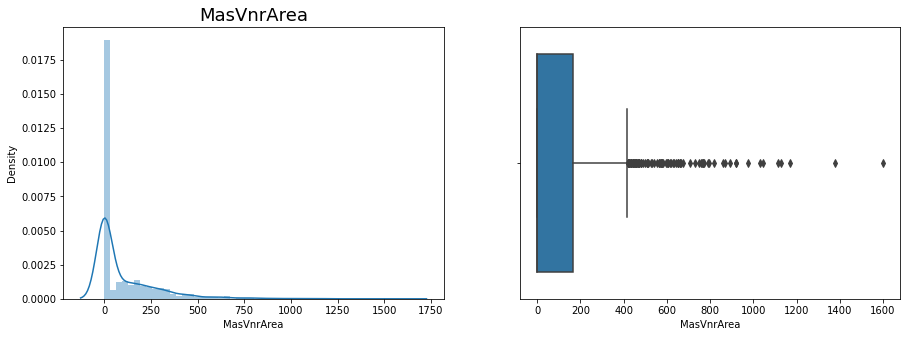

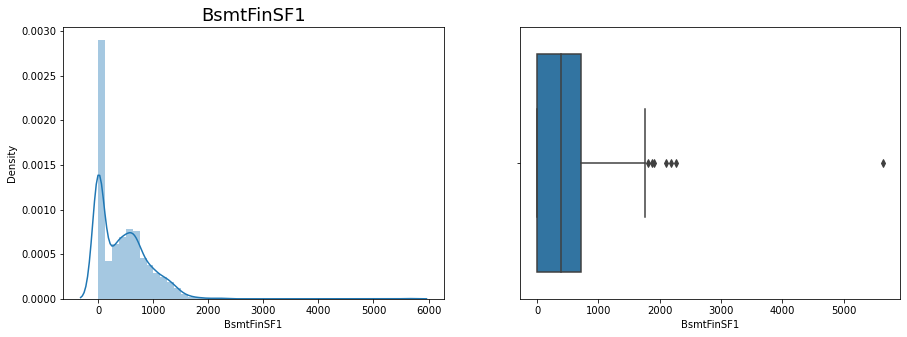

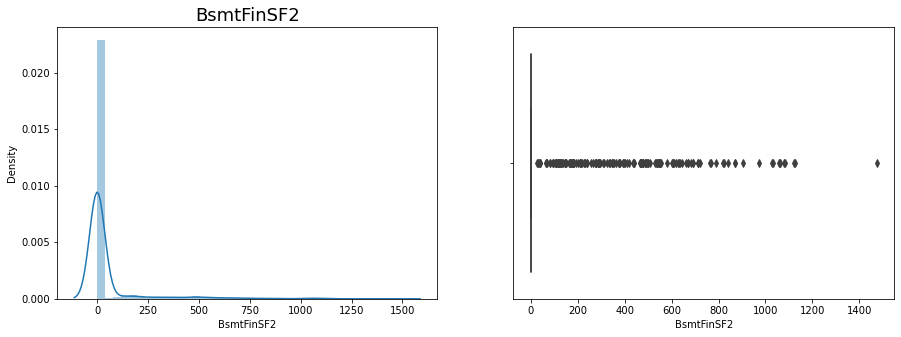

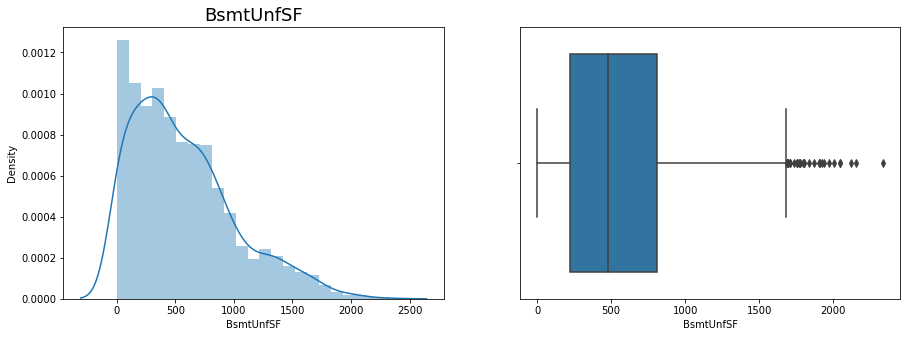

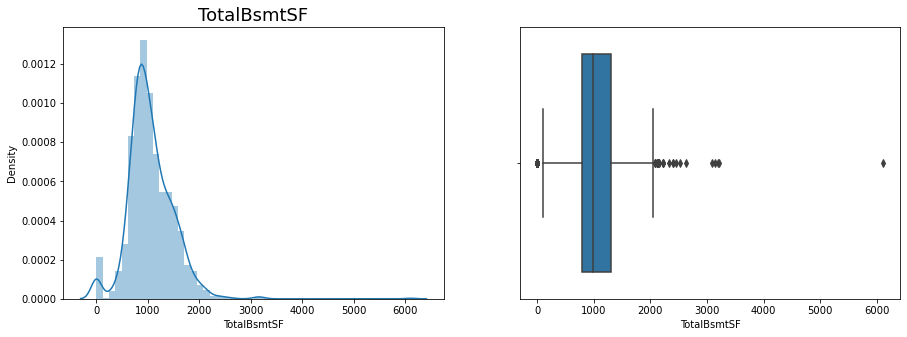

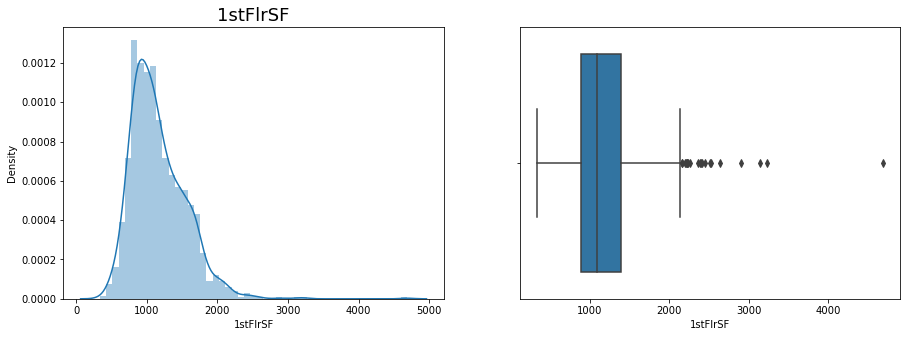

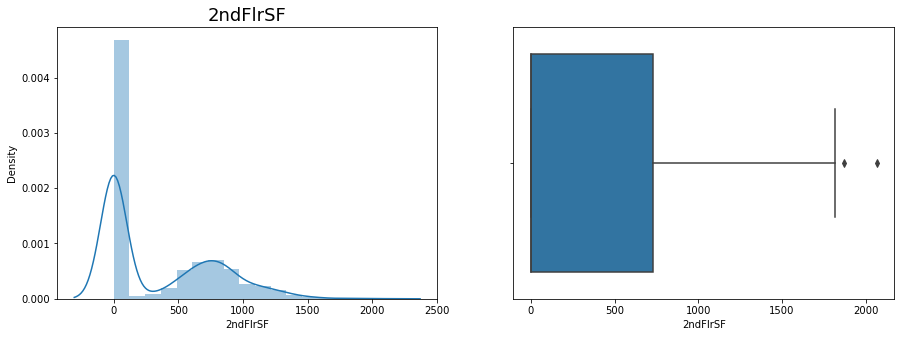

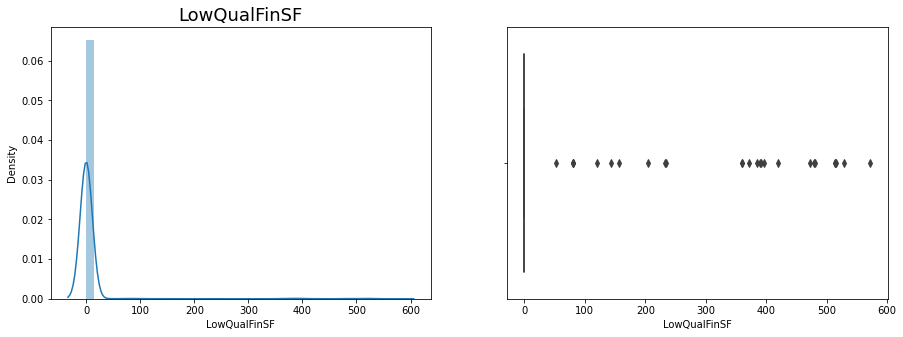

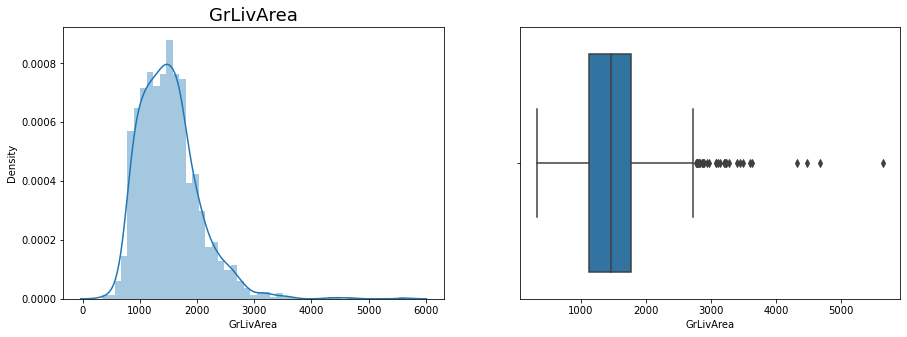

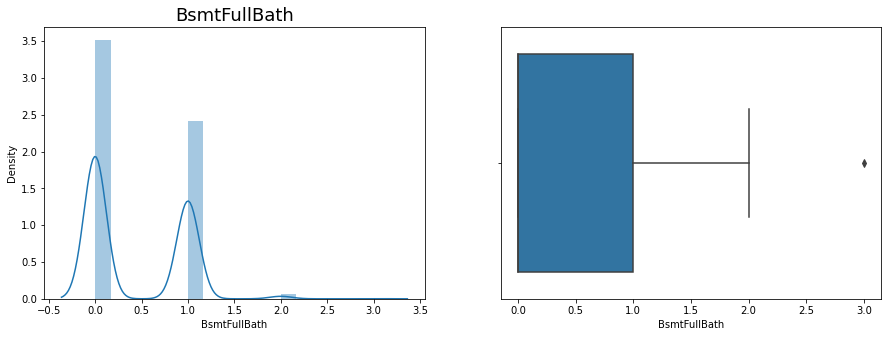

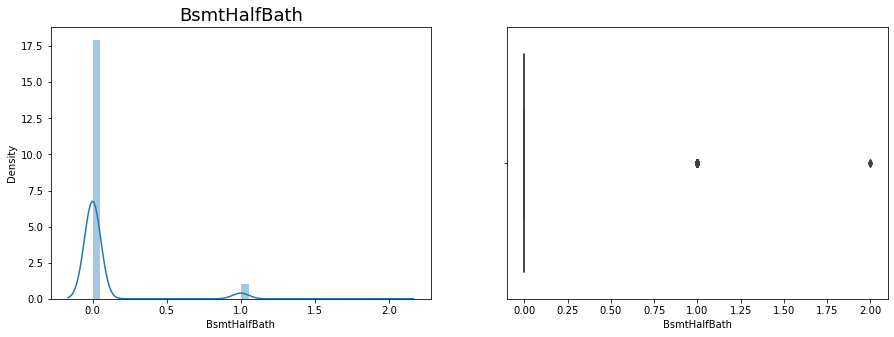

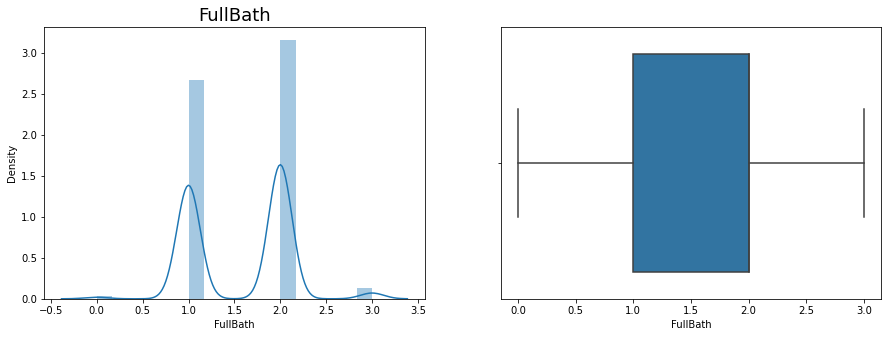

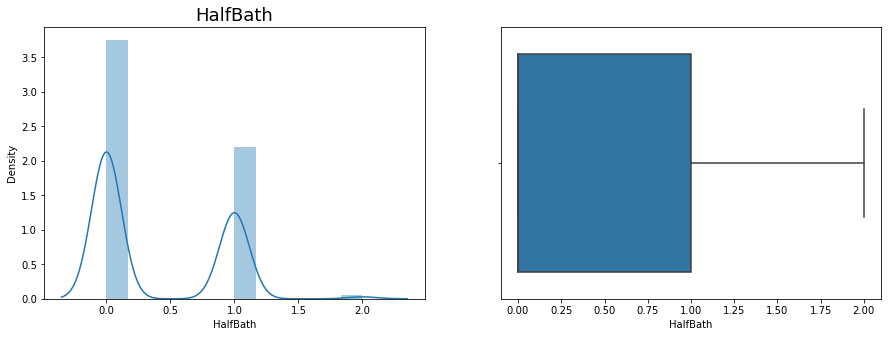

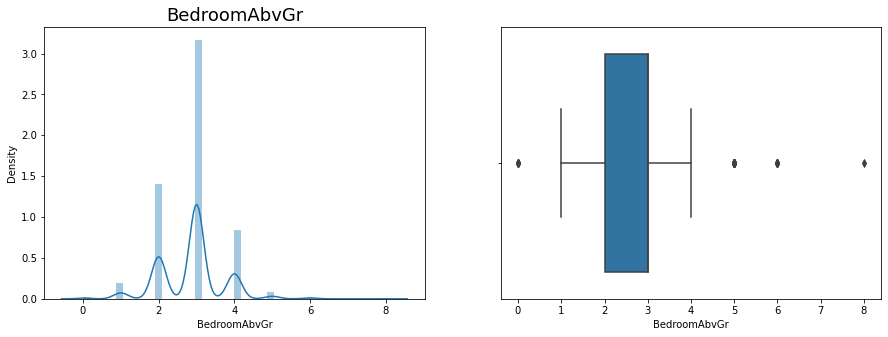

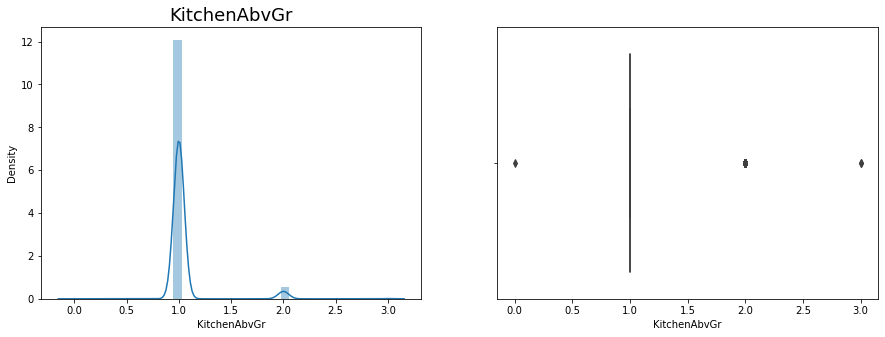

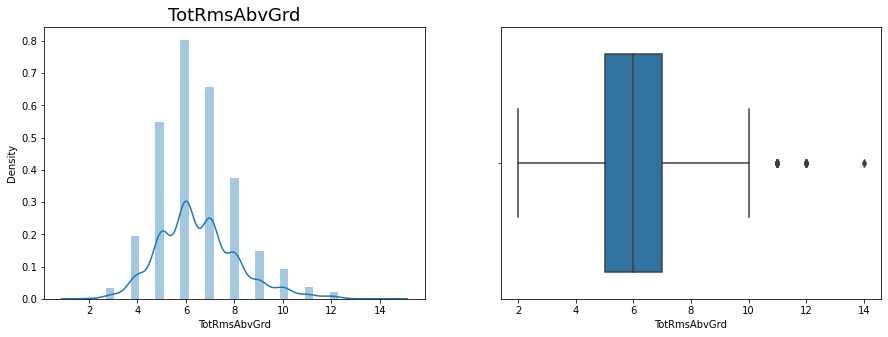

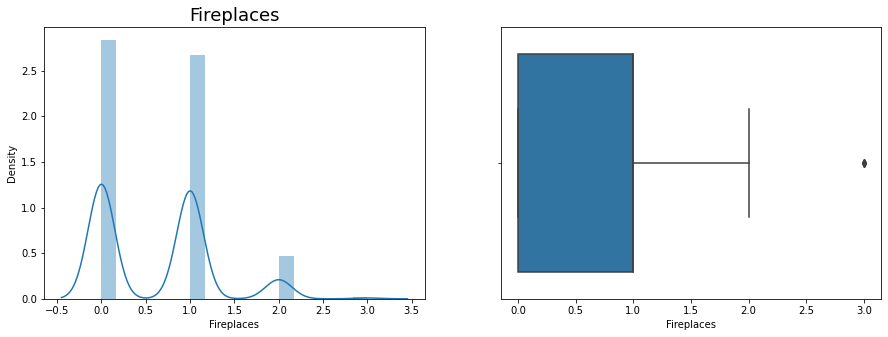

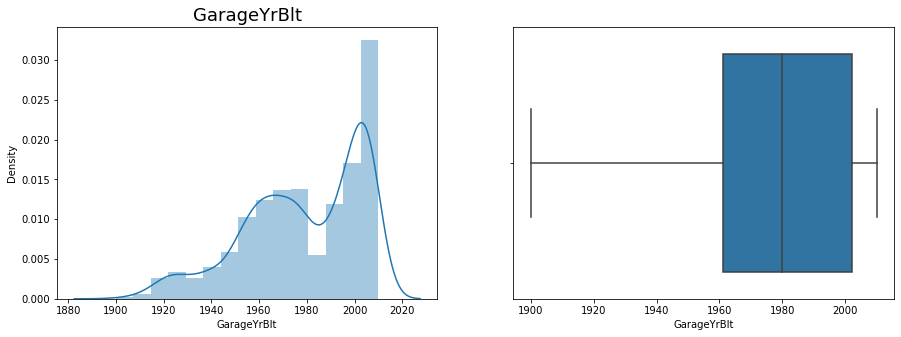

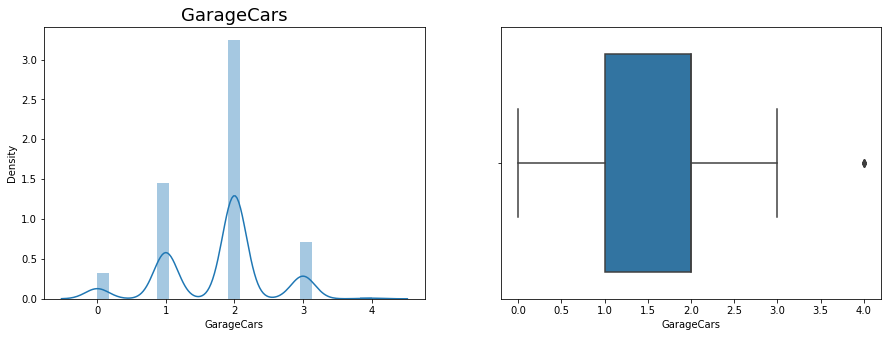

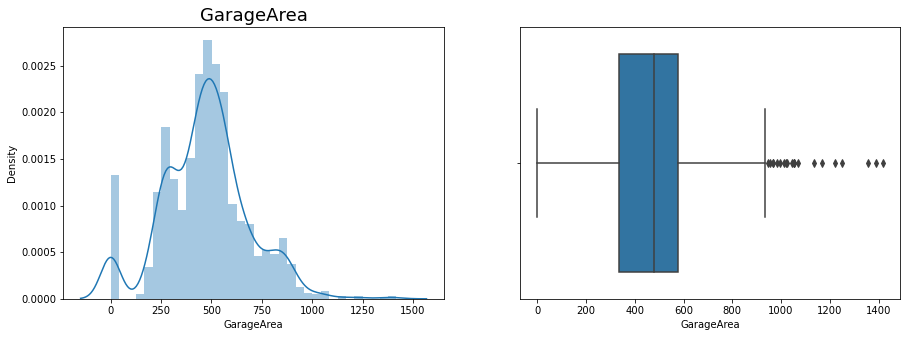

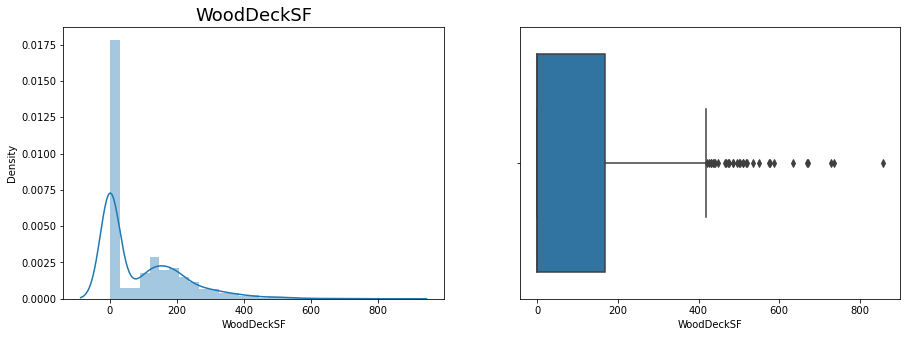

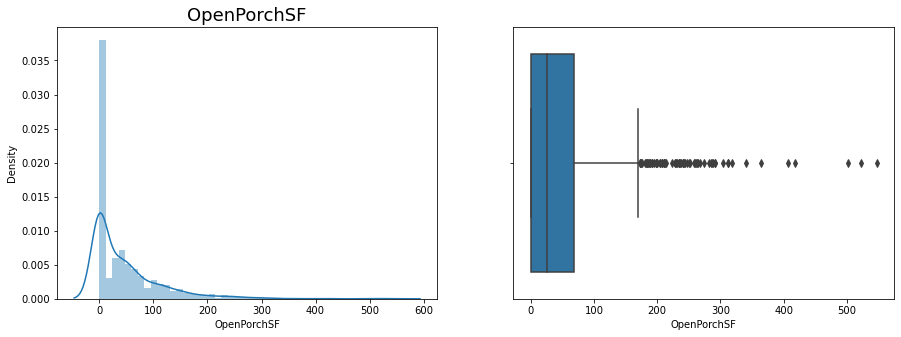

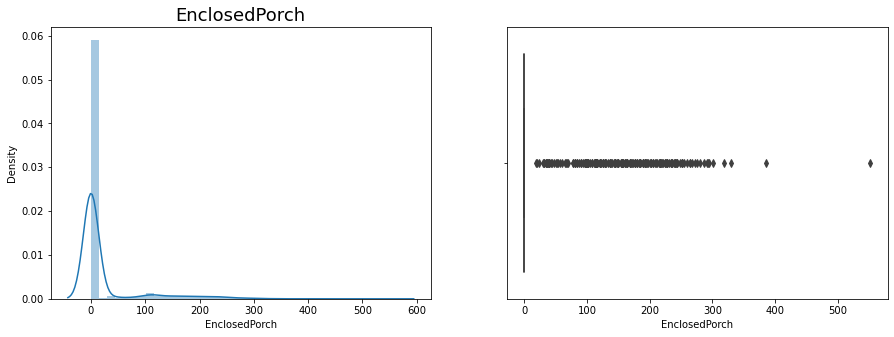

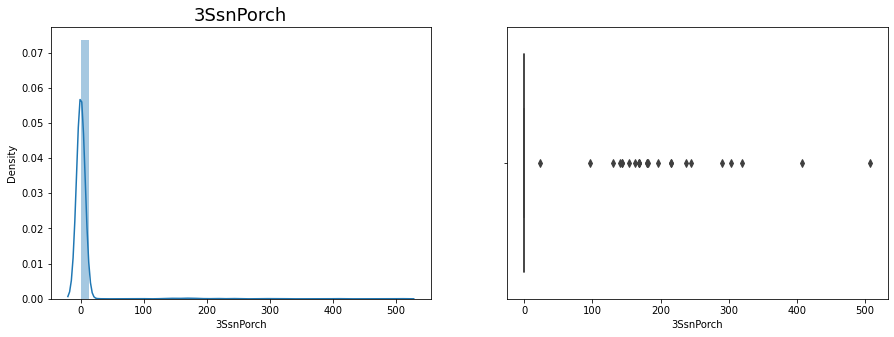

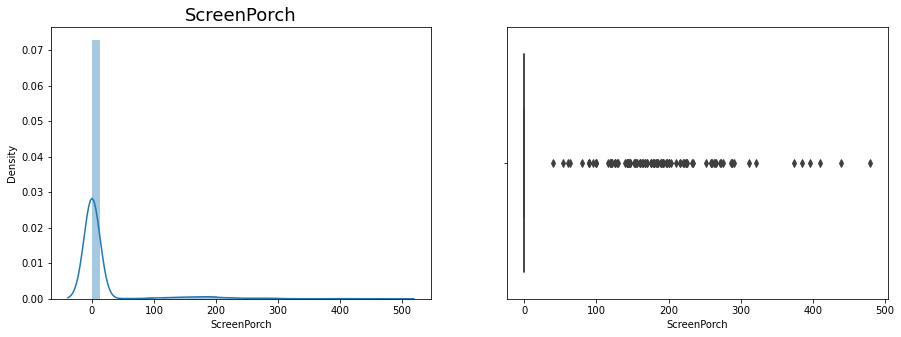

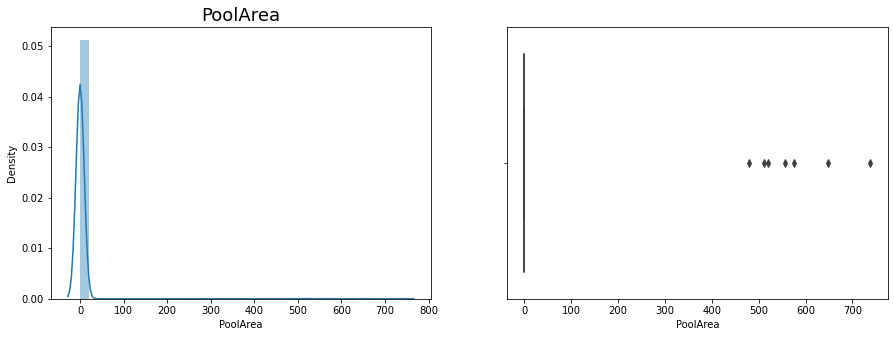

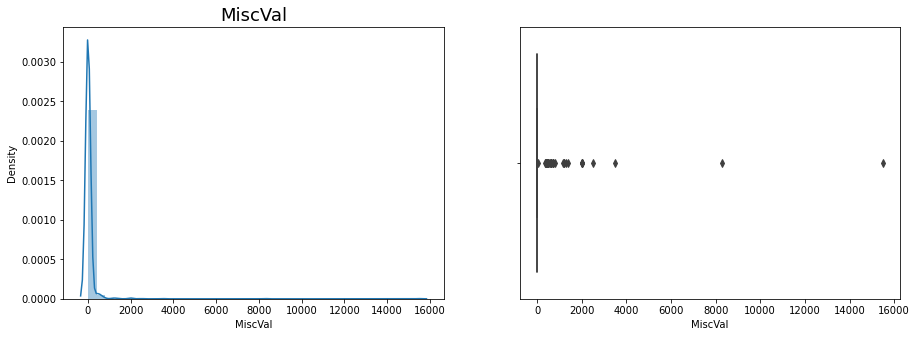

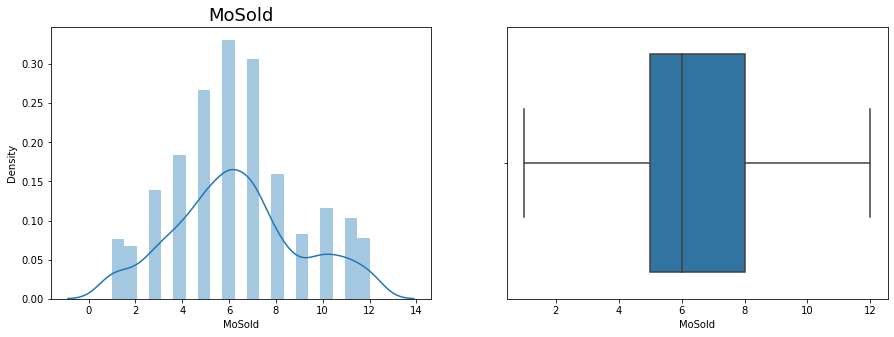

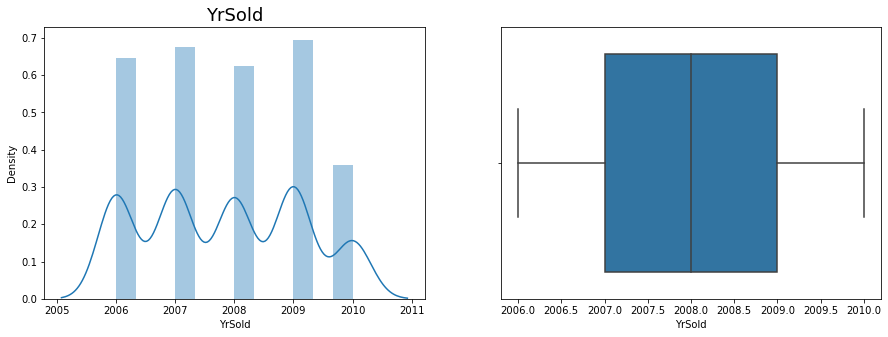

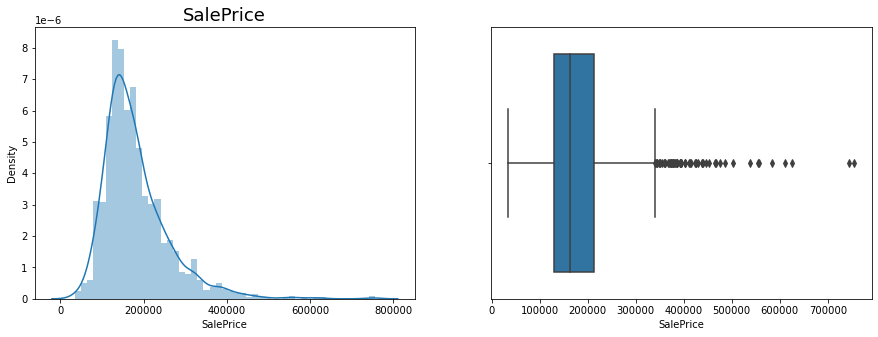

In [316]:
#Boxplots to visulaise Outliers
numerical_df = data.select_dtypes (include=['int64','float64'])
for col in numerical_df.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(numerical_df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(numerical_df[col])
    plt.show()    

In [317]:
#Reassigning max and min value in the numerical columns to remove outliers
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = data[feature].quantile(.75) - data[feature].quantile(.25) 
        max_value = data[feature].quantile(.75)+1.5*IQR
        min_value = data[feature].quantile(.25)-1.5*IQR
        data[feature][data[feature] > max_value] = max_value
        data[feature][data[feature] < min_value ] = min_value

### Missing value Detection

In [318]:
#Checking for the null values in column data and returns columns containing nulls, and the precentage of the nulls
round((pd.isnull(data).sum()[pd.isnull(data).sum() > 0])*100/len(data)),2

(LotFrontage      18.0
 Alley            94.0
 MasVnrType        1.0
 MasVnrArea        1.0
 BsmtQual          3.0
 BsmtCond          3.0
 BsmtExposure      3.0
 BsmtFinType1      3.0
 BsmtFinType2      3.0
 Electrical        0.0
 FireplaceQu      47.0
 GarageType        6.0
 GarageYrBlt       6.0
 GarageFinish      6.0
 GarageQual        6.0
 GarageCond        6.0
 PoolQC          100.0
 Fence            81.0
 MiscFeature      96.0
 dtype: float64,
 2)

In [319]:
# Columns with missing values above 80% are dropped from data
data.drop('PoolQC',axis=1,inplace=True)
data.drop('MiscFeature',axis=1,inplace=True)
data.drop('Alley',axis=1,inplace=True)
data.drop('Fence',axis=1,inplace=True)

In [320]:
#Dropping duplicates if any and cheching the shape to get the count of rows dropped
data.drop_duplicates(inplace=True)
data.shape

(1460, 76)

 No duplicates in data

## Missing Value Treatment
### 1) Treating Missing values in categorical columns in data                 

According to the data dictionary provided, the nulls the categorical columns indicates the absence of facility which may affect the price.
Hence nan is replaced by None to denote the absence of that facility

In [321]:
# Select categorical columns with null values
categorical_columns = data.select_dtypes (include=['object']).columns
categorical_columns_with_null = data[categorical_columns].columns[data[categorical_columns].isnull().any()].tolist()

#Replacing nan in the categorical columns with None in data
data[categorical_columns_with_null] = data[categorical_columns_with_null].replace({pd.NA: 'None'})


In [322]:
#Rechecking for the null values in column data and returns columns containing nulls, and the precentage of the nulls
round((pd.isnull(data).sum()[pd.isnull(data).sum() > 0])*100/len(data)),2

(LotFrontage    18.0
 MasVnrArea      1.0
 GarageYrBlt     6.0
 dtype: float64,
 2)

#### All the missing values in categorical columns are removed

###  2) Missing Value treatment in Numerical columns of dataset

In [323]:
# To get the description of the dataset
data.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,69.134888,9647.388014,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,19.662022,3594.356399,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,27.500000,1481.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,111.500000,17673.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


In [324]:
# Imputing Null values of LotFrontage column using median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [325]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1460.000000
mean       69.110959
std        17.831709
min        27.500000
25%        60.000000
50%        69.000000
75%        79.000000
max       111.500000
Name: LotFrontage, dtype: float64

In [326]:
# Imputing Null values of MasVnrArea column using median
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

In [327]:
# Crosscheck the updated 'MasVnrArea' column
data['MasVnrArea'].describe()

count    1460.000000
mean       89.697945
std       134.719570
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       415.000000
Name: MasVnrArea, dtype: float64

In [328]:
# Imputing Null values of GarageYrBlt column using median
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [329]:
# Crosscheck the updated 'GarageYrBlt' column
data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [330]:
#Rechecking for the null values in column data and returns columns containing nulls, and the precentage of the nulls
round((pd.isnull(data).sum()[pd.isnull(data).sum() > 0])*100/len(data)),2

(Series([], dtype: float64), 2)

#### All the missing values got imputed. All Nans got replaced with None in categorical columns and missing values in numerical columns got imputed with median 

## Exploratory Data Analysis
### Univariate & Bivariate Analysis on Numerical Data

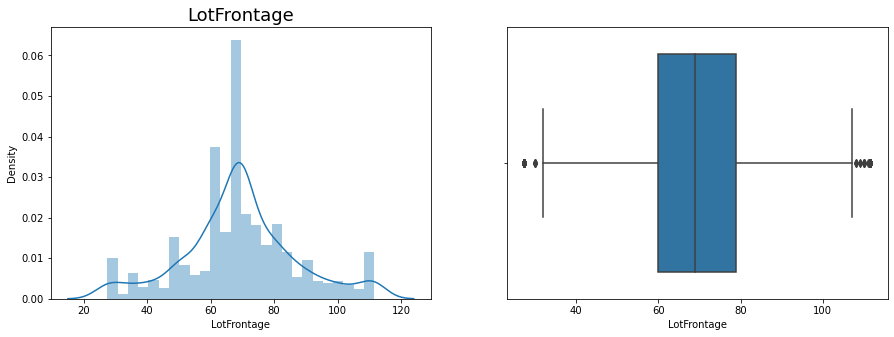

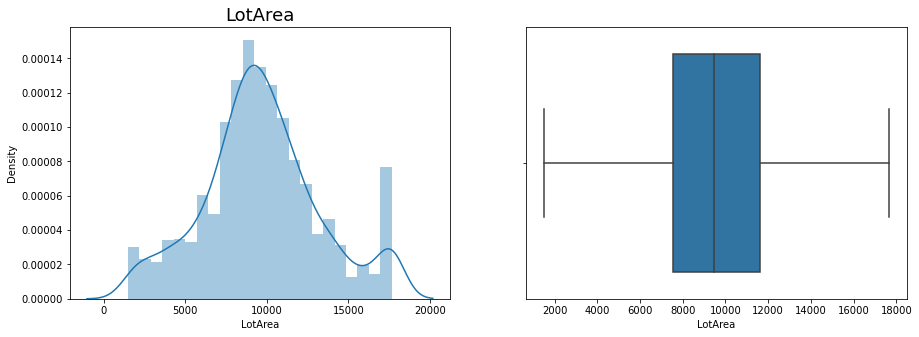

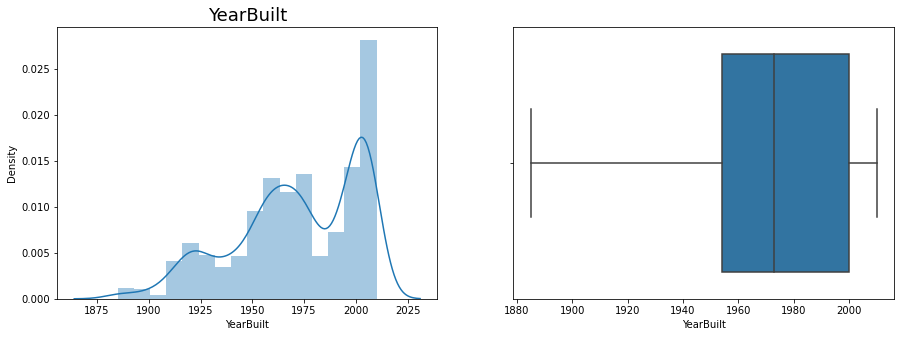

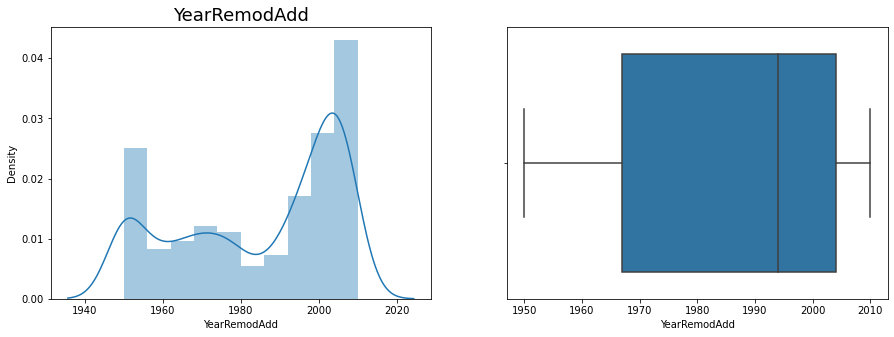

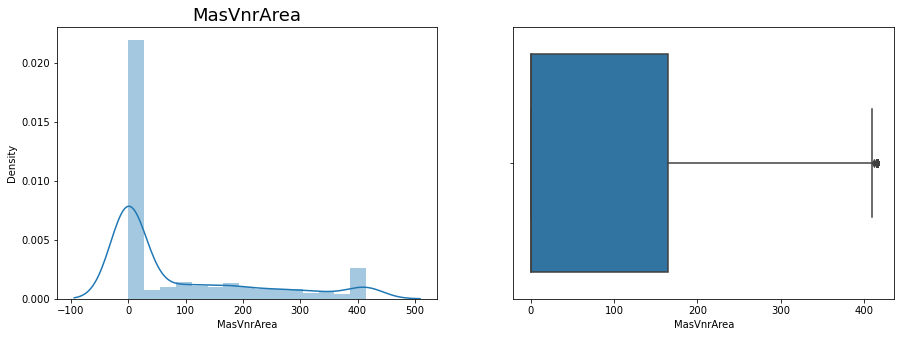

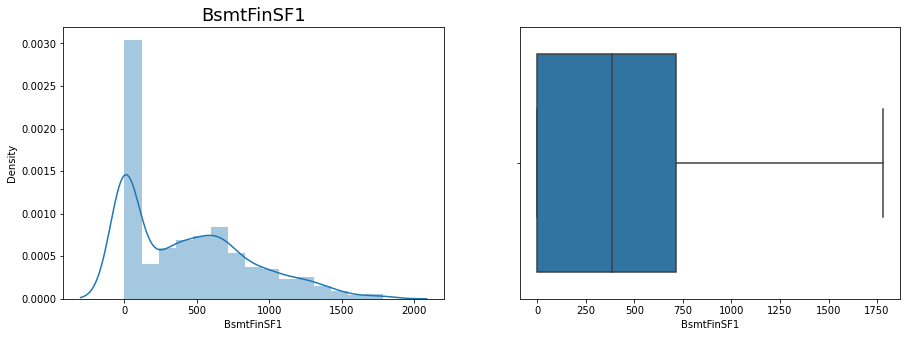

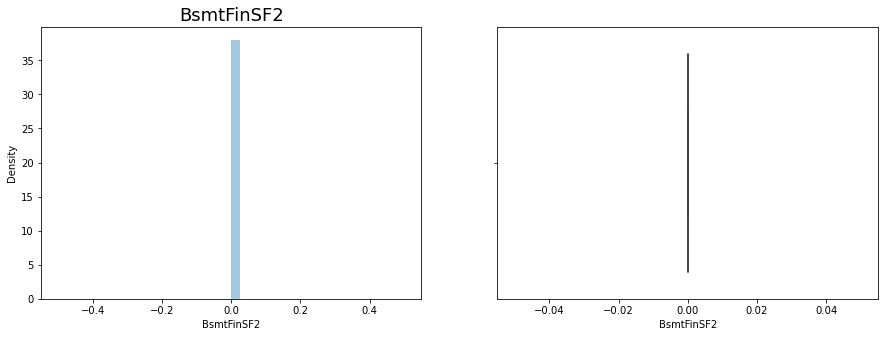

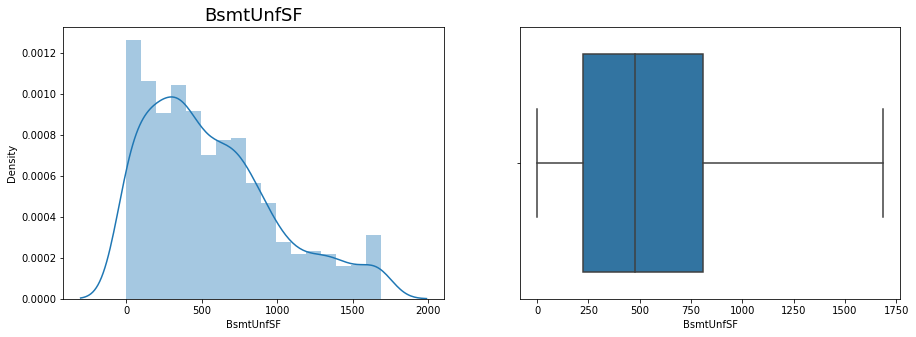

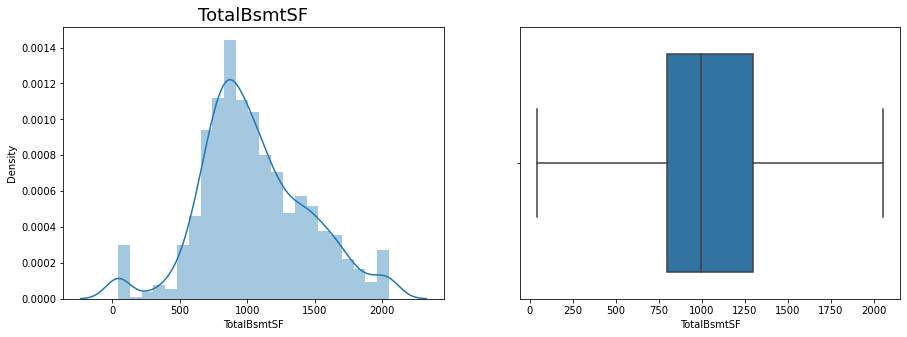

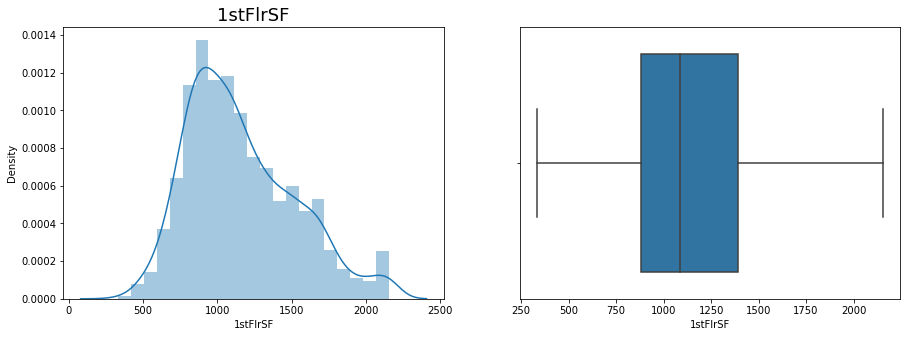

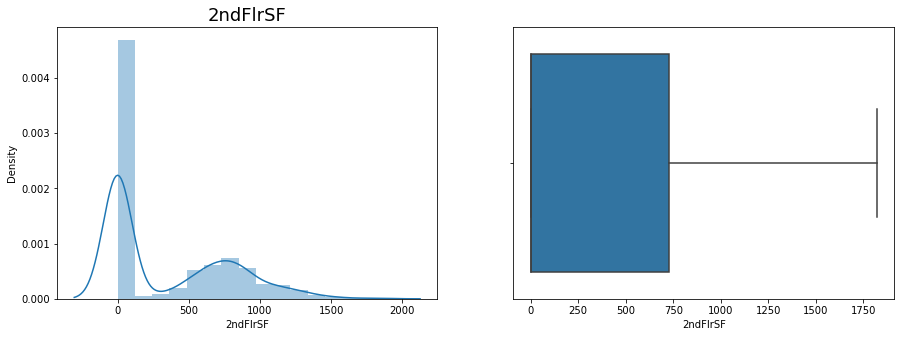

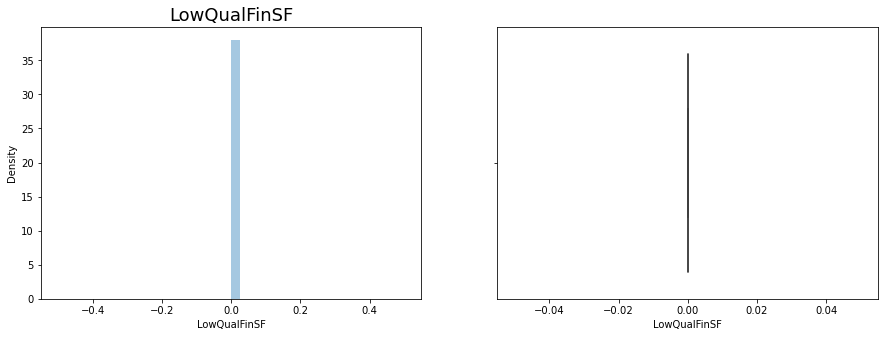

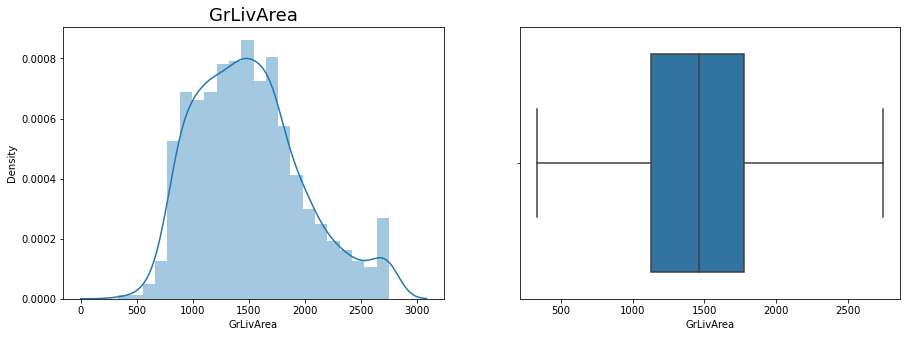

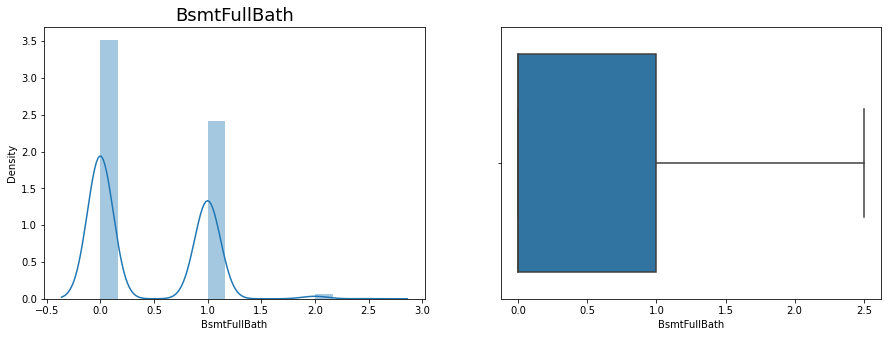

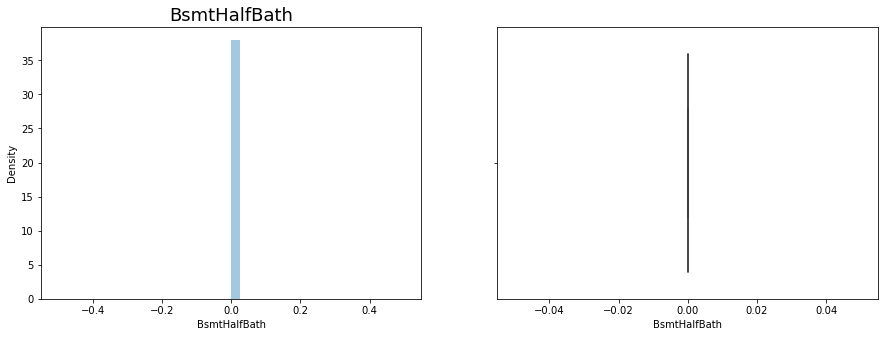

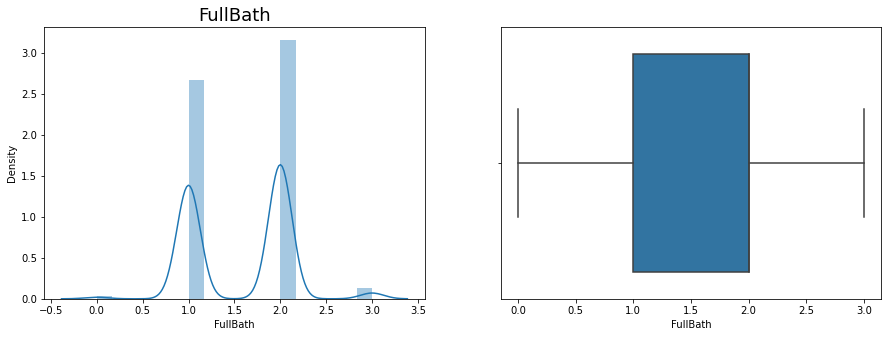

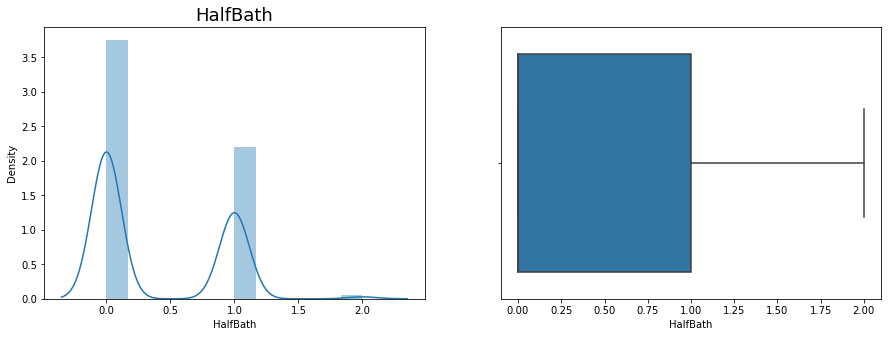

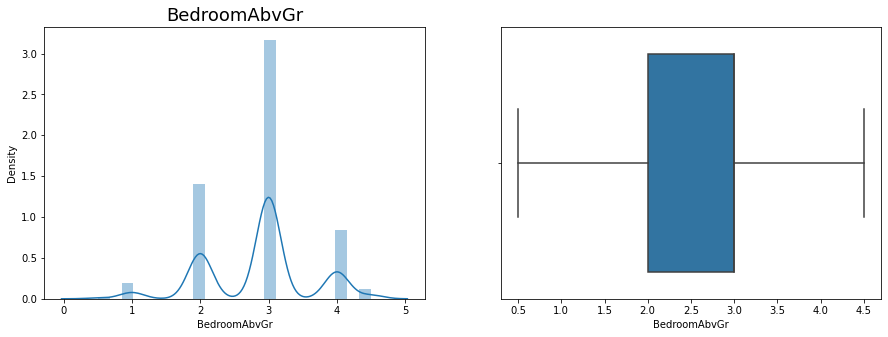

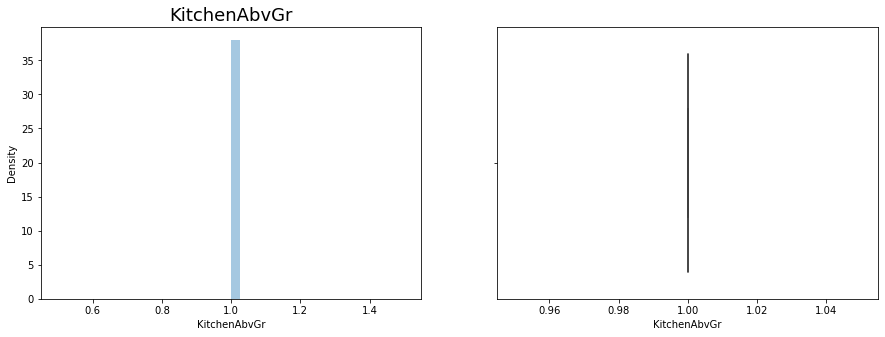

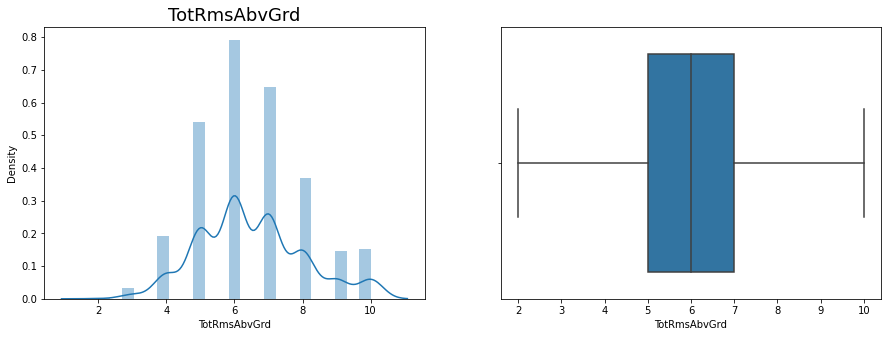

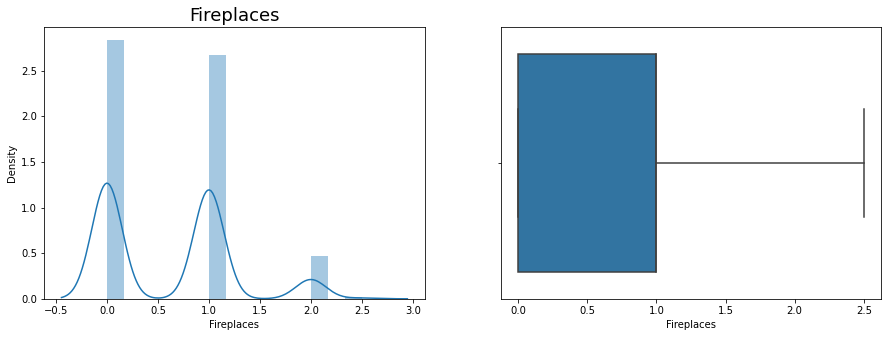

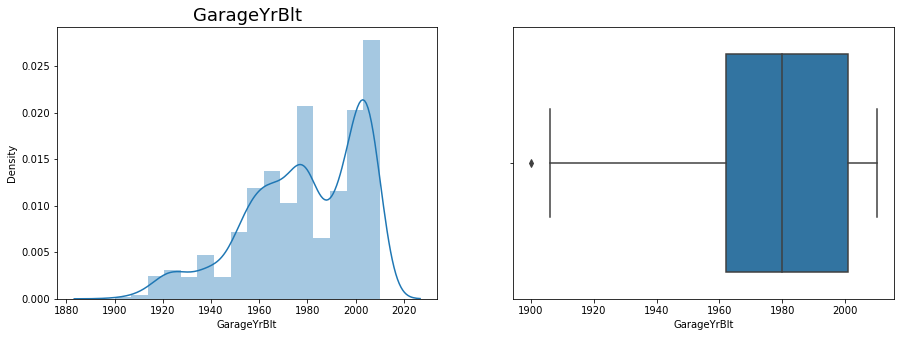

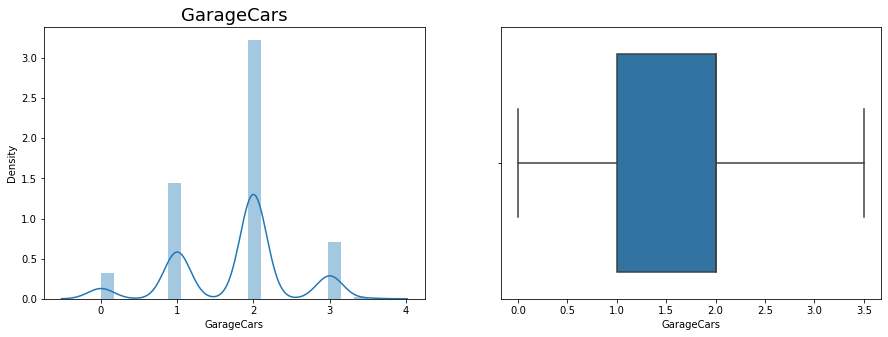

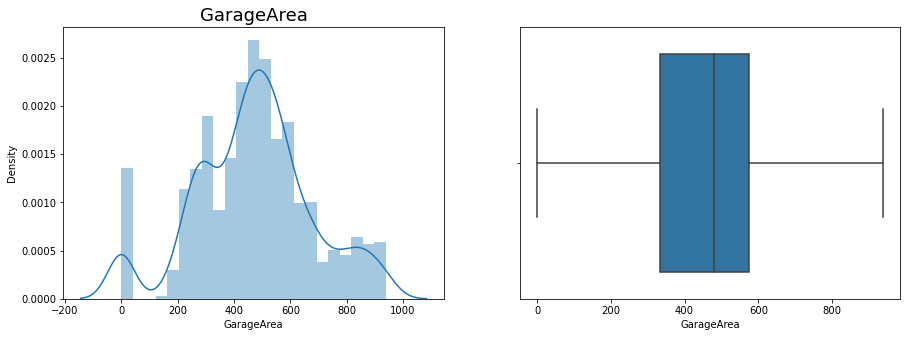

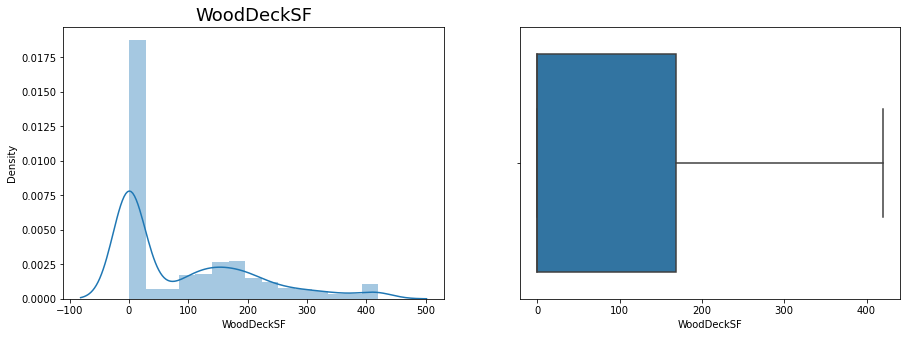

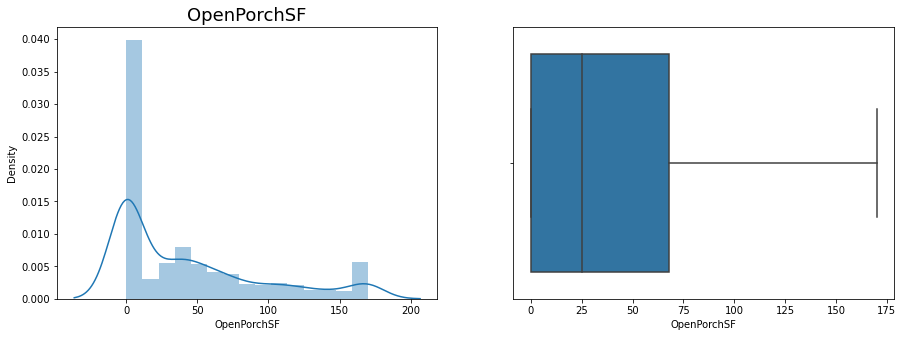

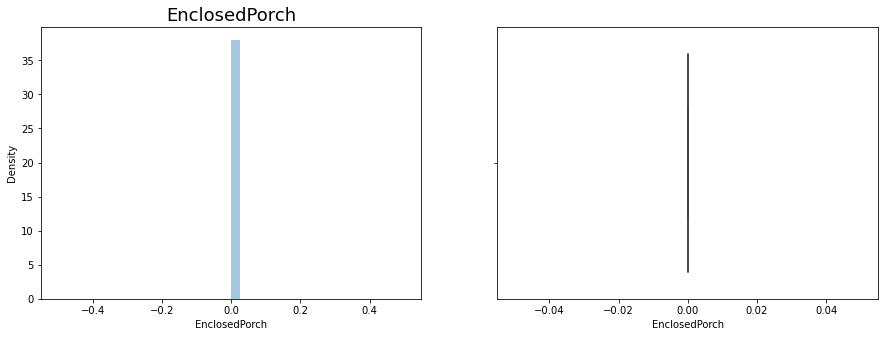

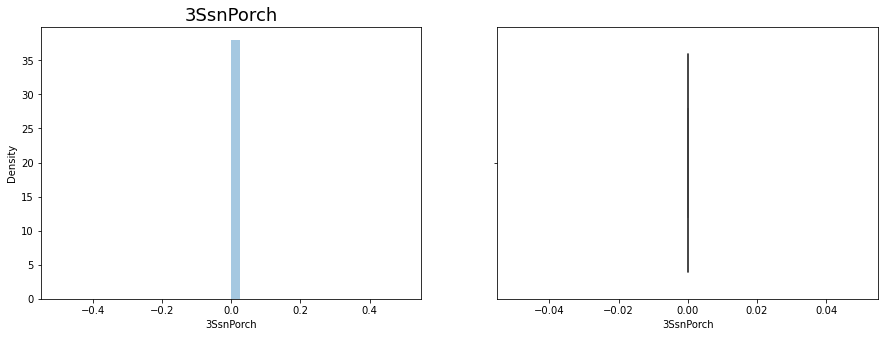

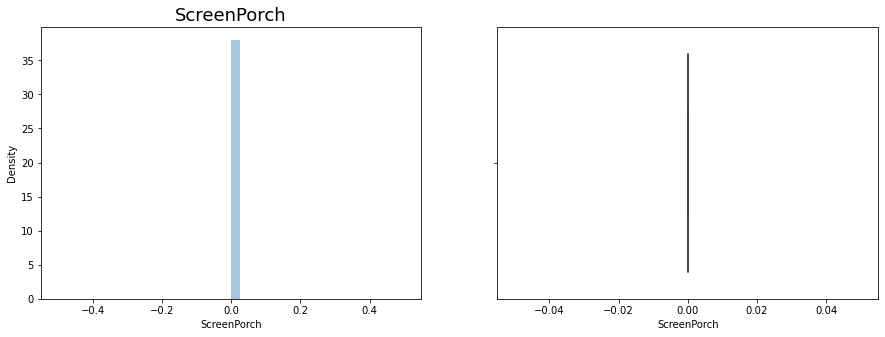

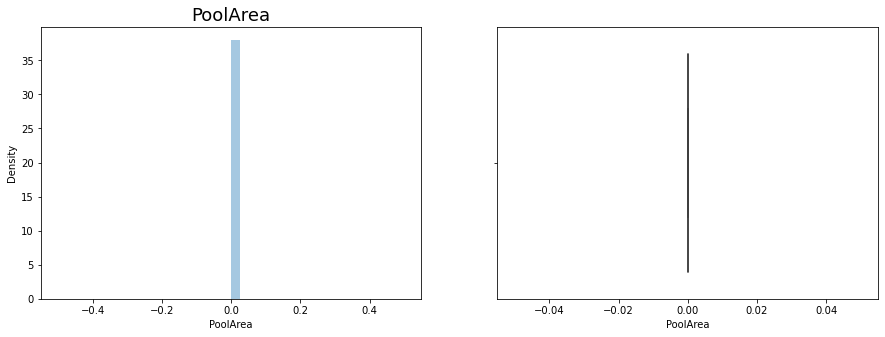

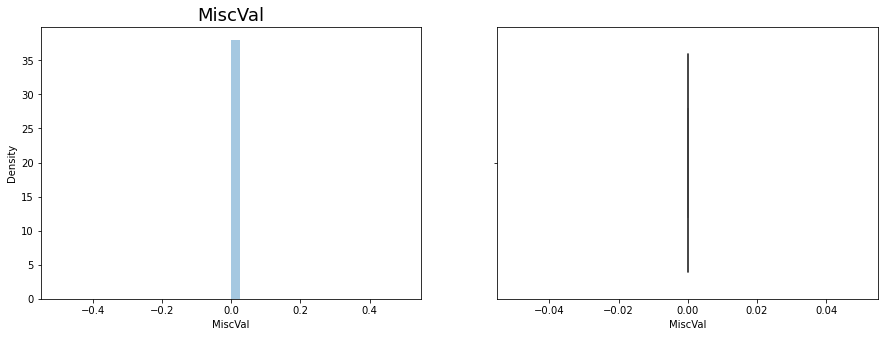

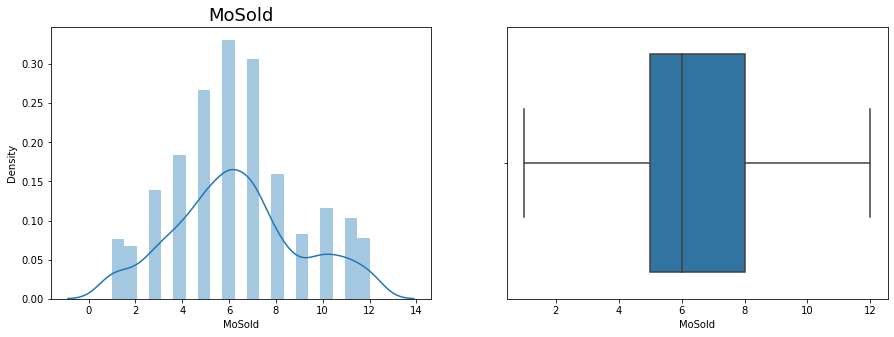

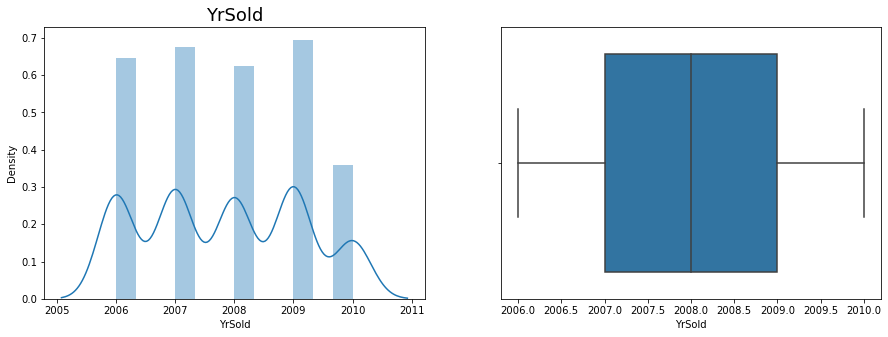

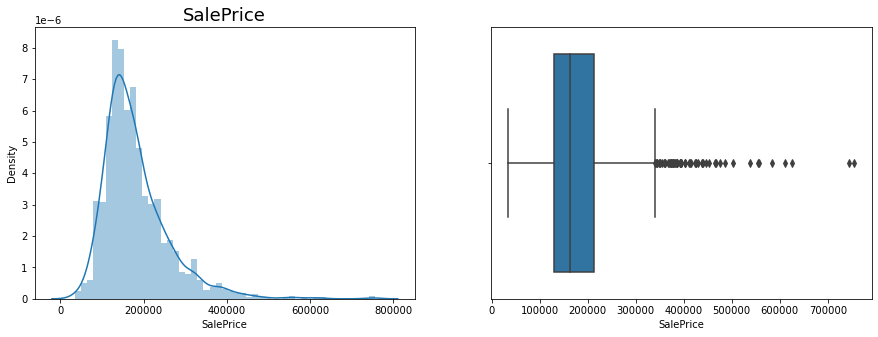

In [331]:
numerical_df = data.select_dtypes (include=['int64','float64'])
for col in numerical_df.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(numerical_df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(numerical_df[col])
    plt.show()    

#### Observations on Numerical columns:
a) The target variable - SalesPrice is right-skewed.

b) Many numerical columns are having non-normal distribution.

c) Many columns have single value they may be dropped


In [332]:
# Find columns with a single value
single_value_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() == 1]

# Print the result
print("Columns with a single value:", single_value_columns)

Columns with a single value: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [333]:
#Rows with single values are dropped
data.drop( ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleConditio

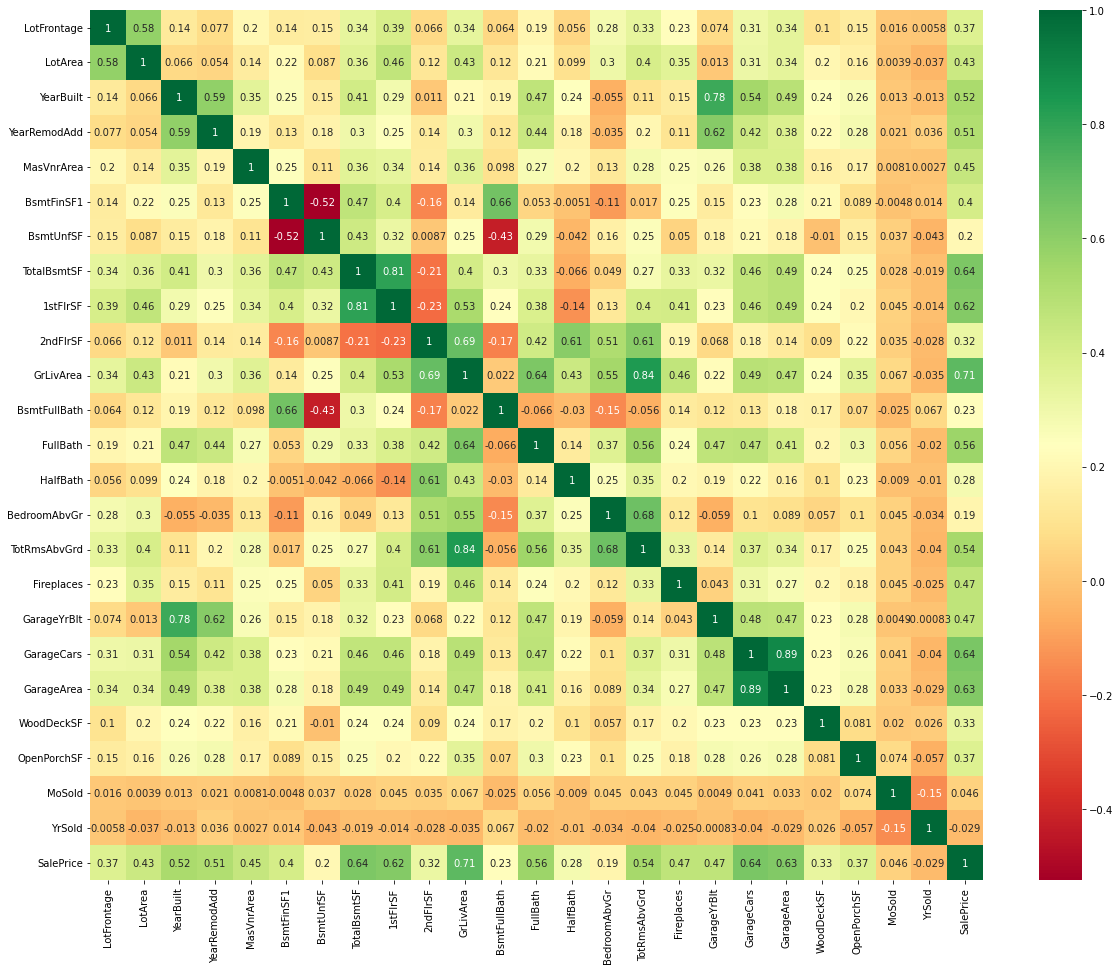

In [334]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn');
plt.show()

Observations:
    
    a) GarageCars and GarageArea (0.89) are highly correlated.
    b) GarageYrBlt and YearBuilt (0.78) are highly correlated.
    c) TotRmsAbvGrd and GrLivArea (0.84) are highly correlated.
    d) TotalBsmtSF and 1stflrSF (0.81) are highly correlated.

### Univariate & Bivariate Analysis of Categorical Data

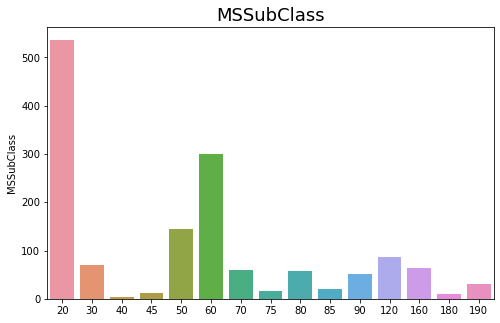

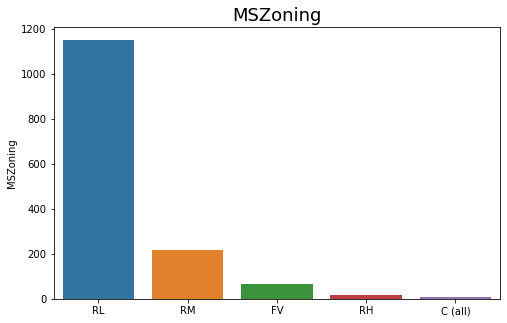

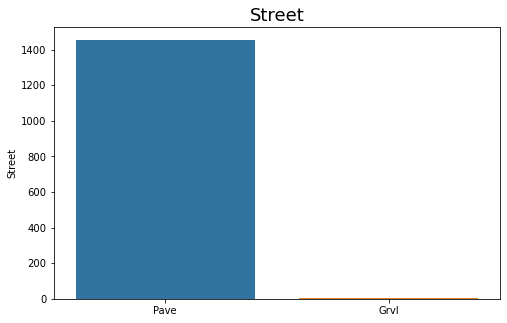

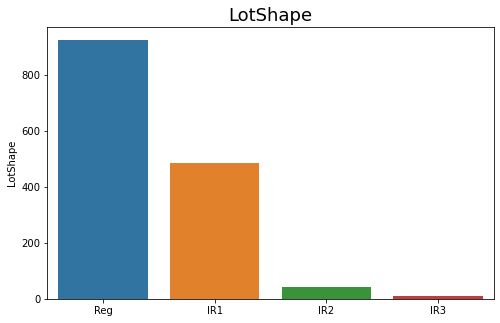

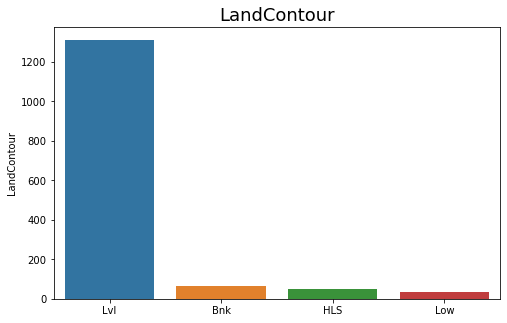

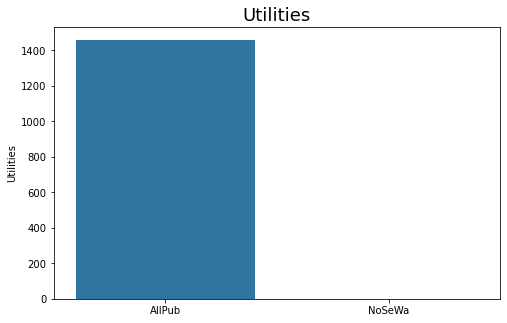

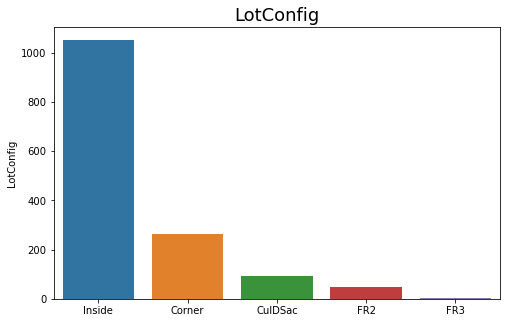

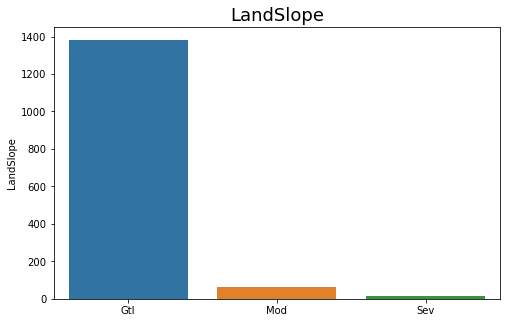

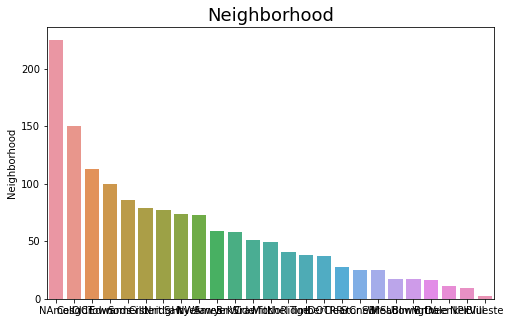

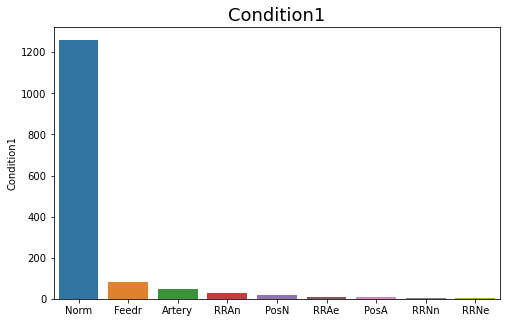

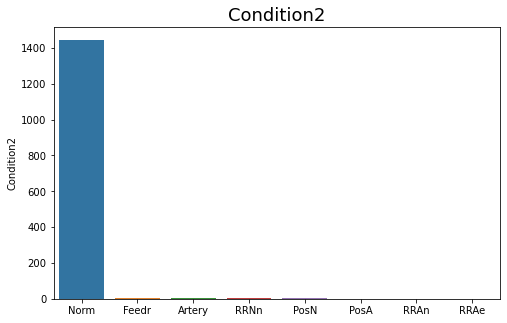

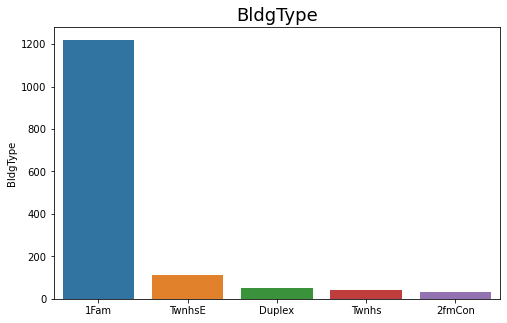

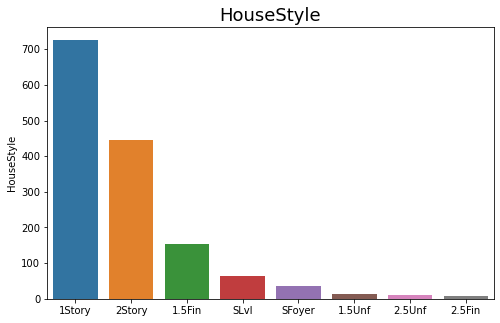

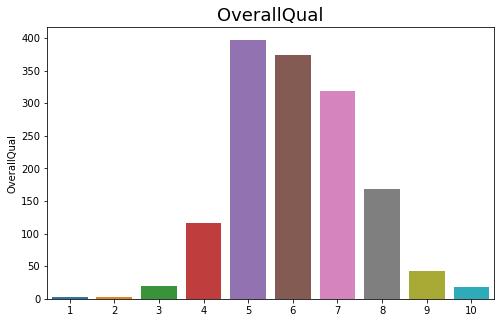

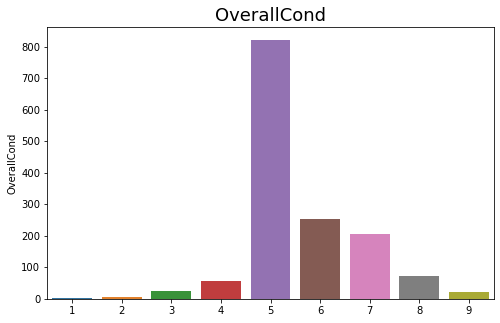

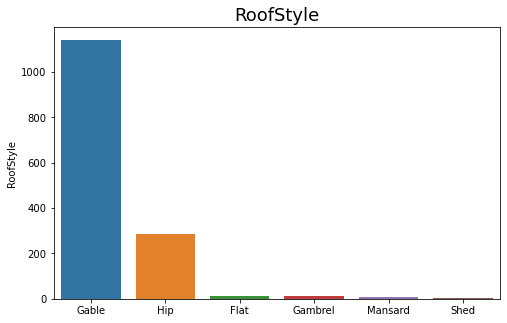

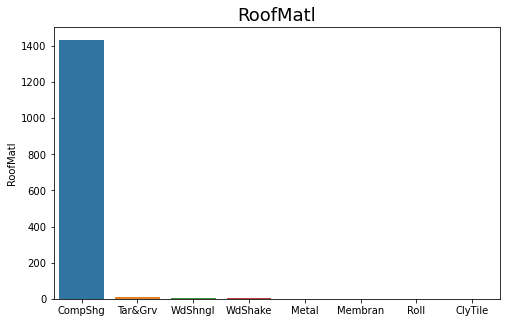

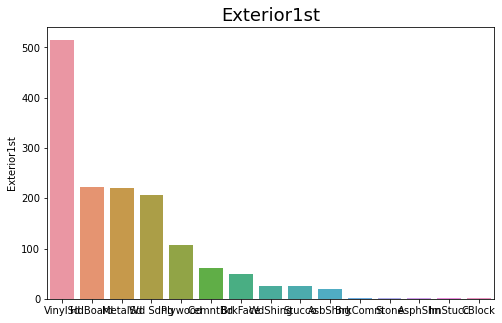

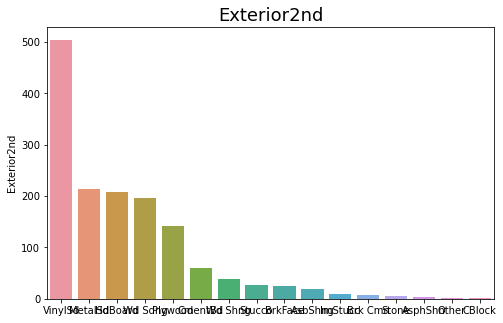

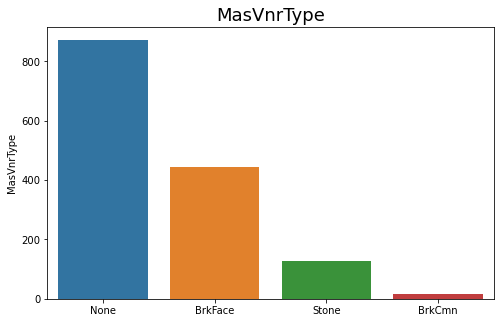

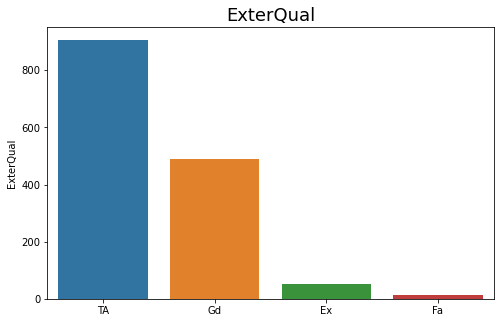

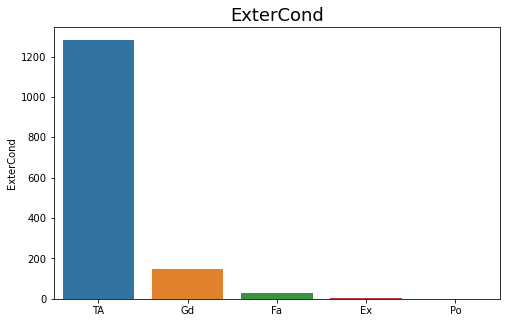

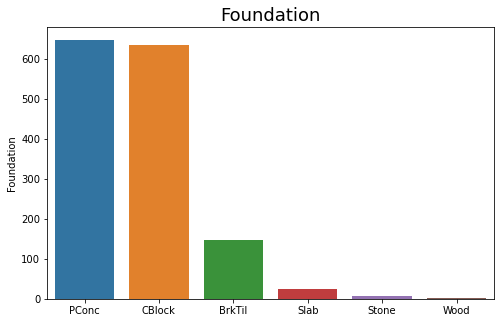

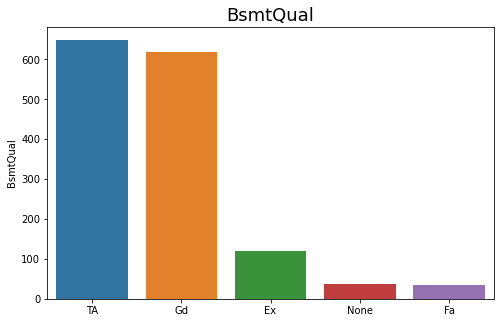

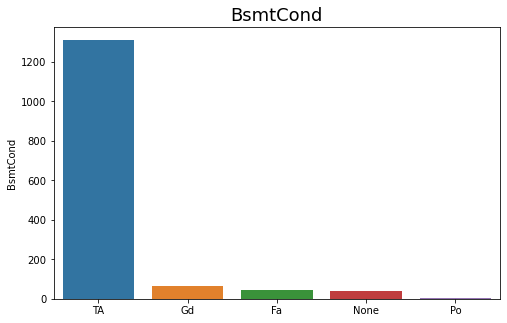

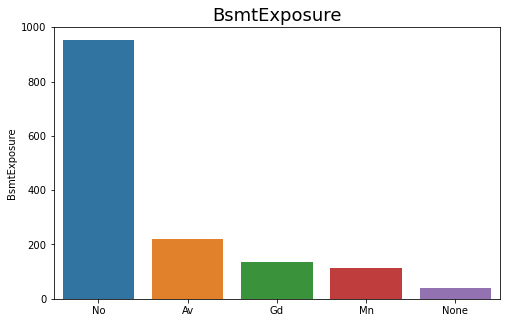

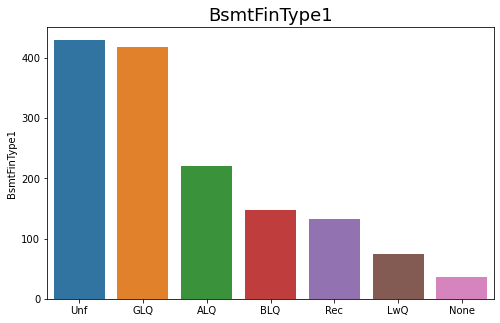

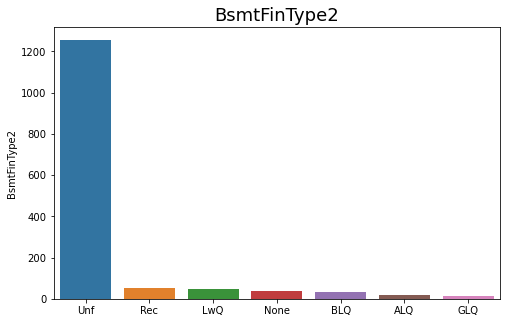

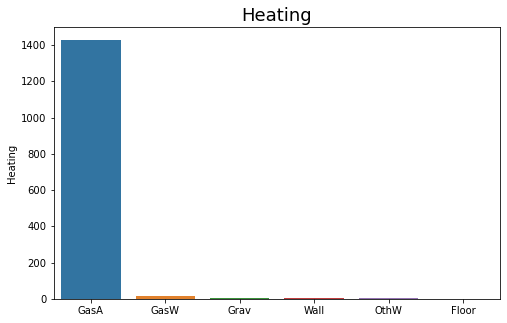

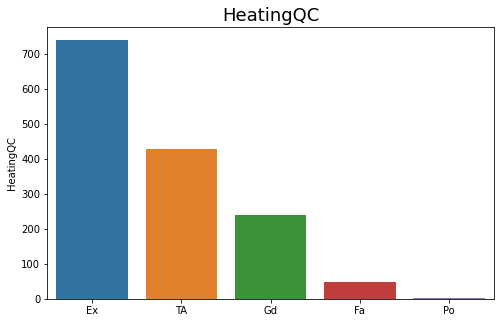

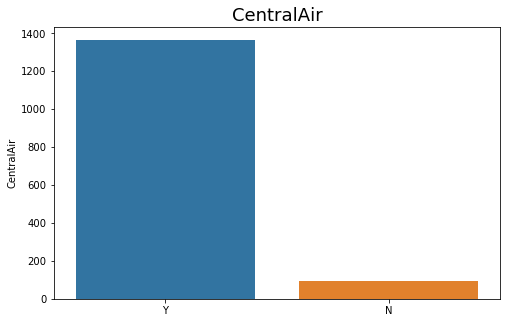

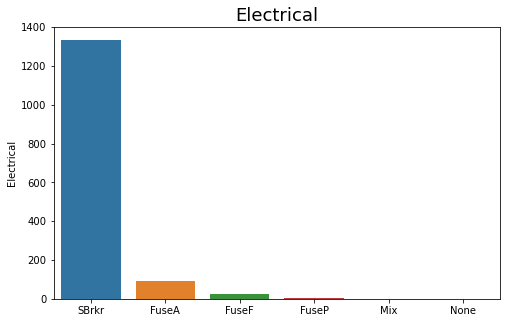

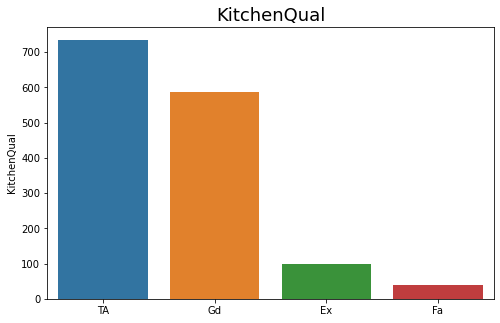

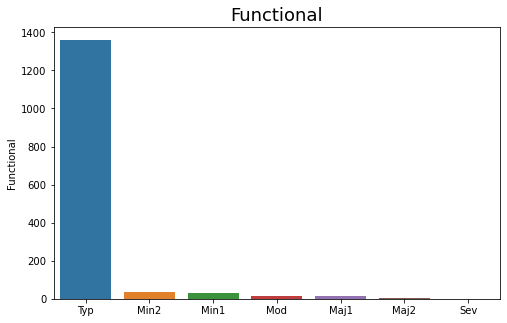

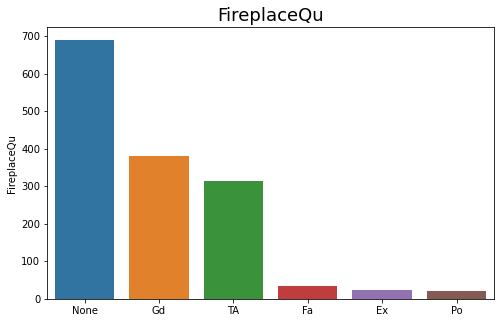

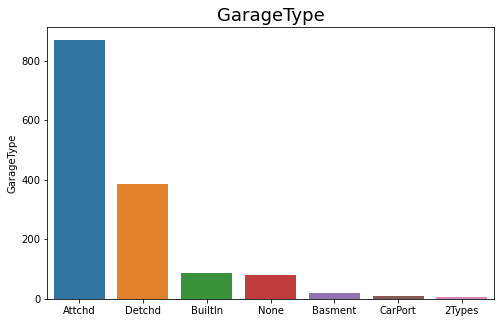

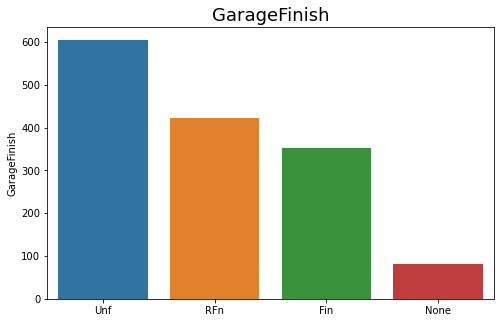

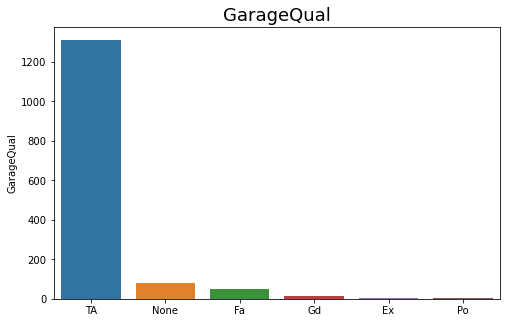

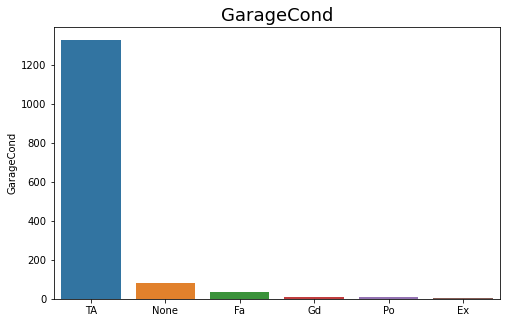

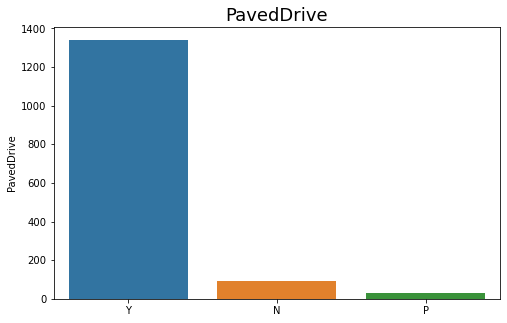

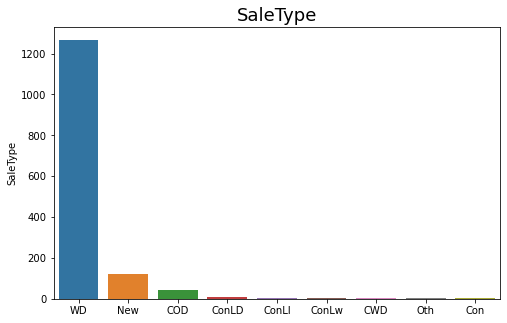

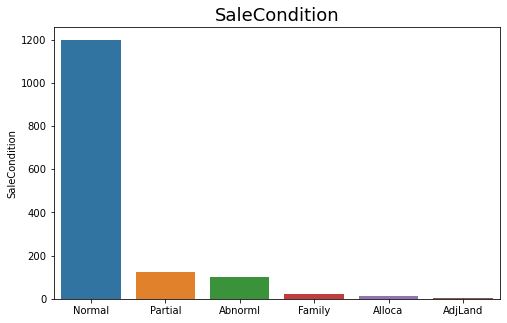

In [335]:
## Visualizing the levels of categorical columns using bar plots
categorical_columns = data.select_dtypes (include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(data[col].value_counts().index, data[col].value_counts())
    plt.show()

In [336]:
# Find columns with a single value
single_value_columns = [col for col in categorical_columns if data[col].nunique() == 1]

# Print the result
print("Columns with a single value:", single_value_columns)

Columns with a single value: []


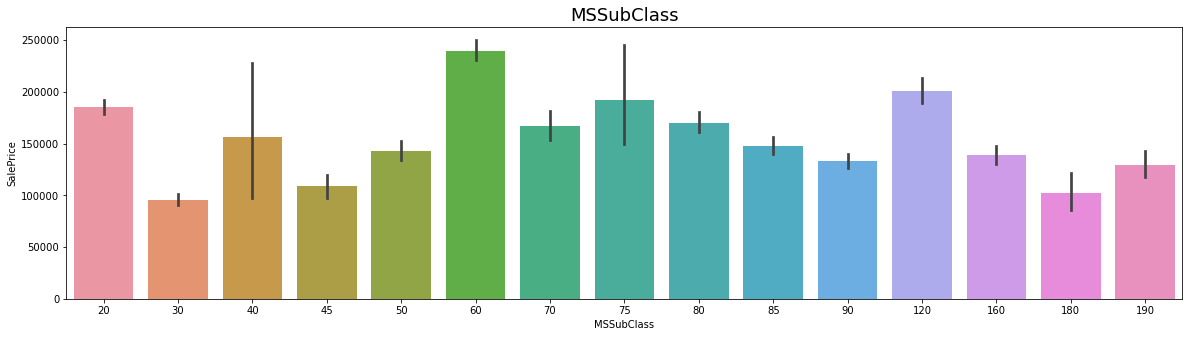

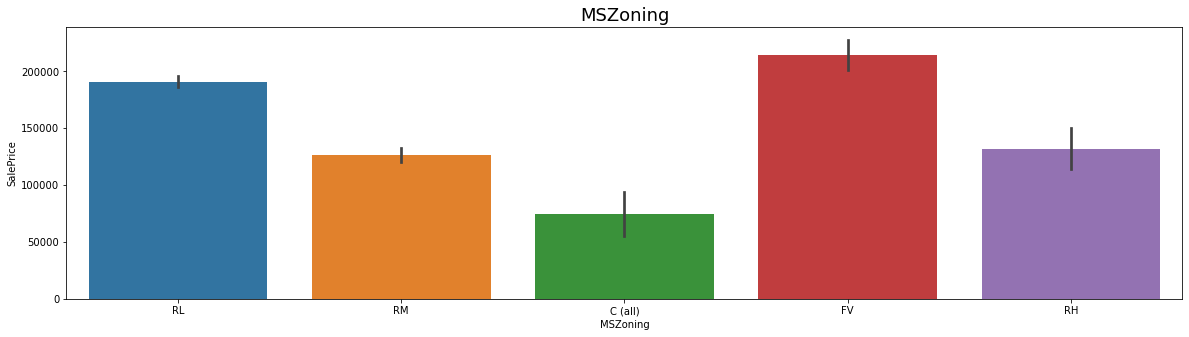

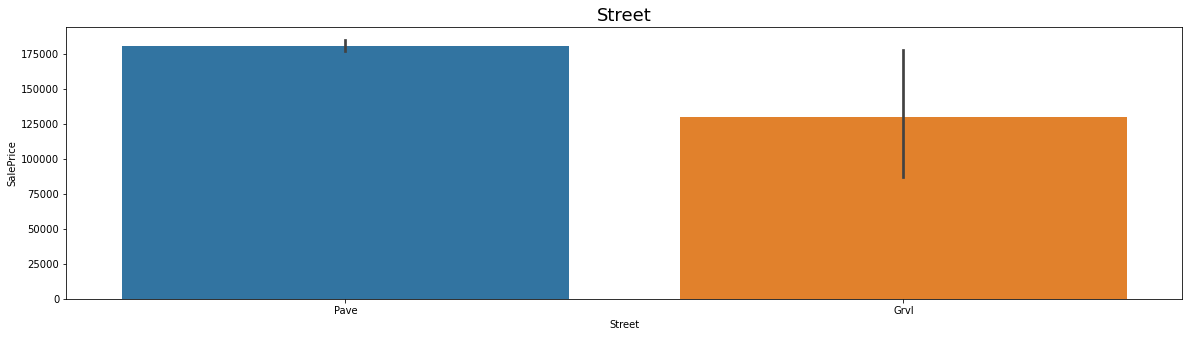

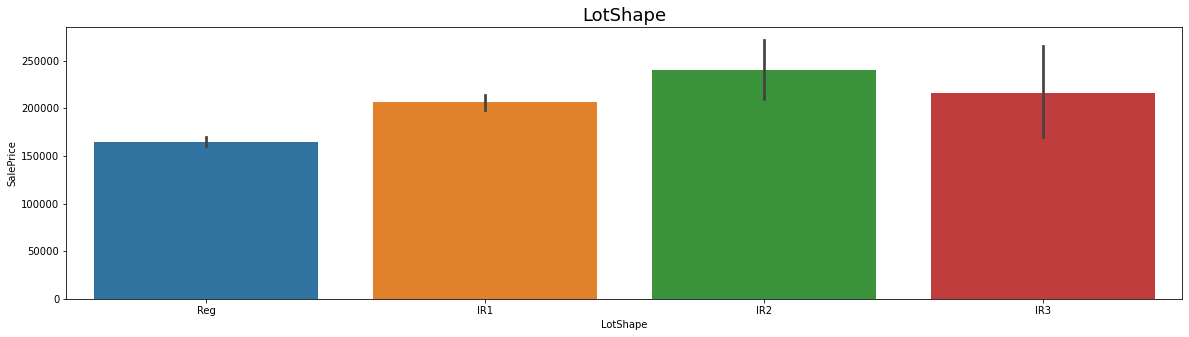

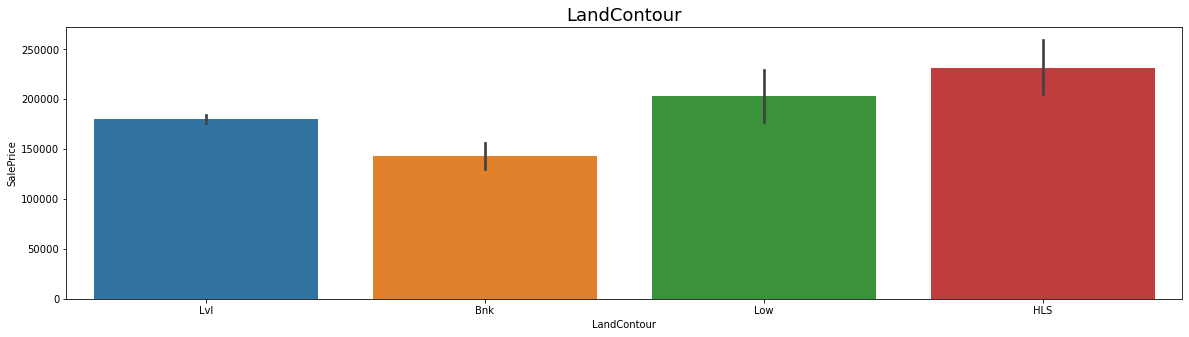

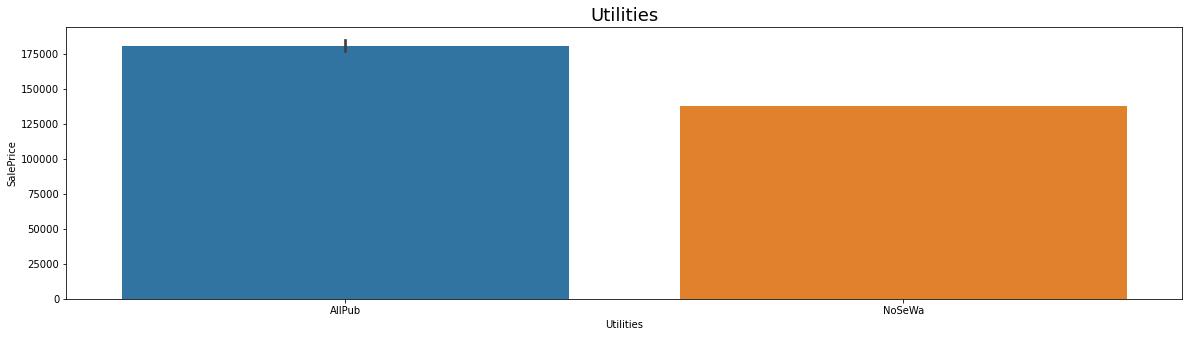

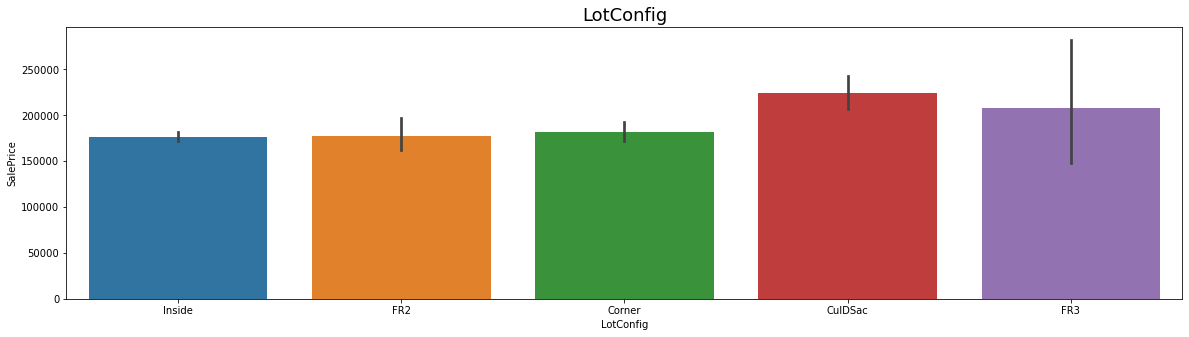

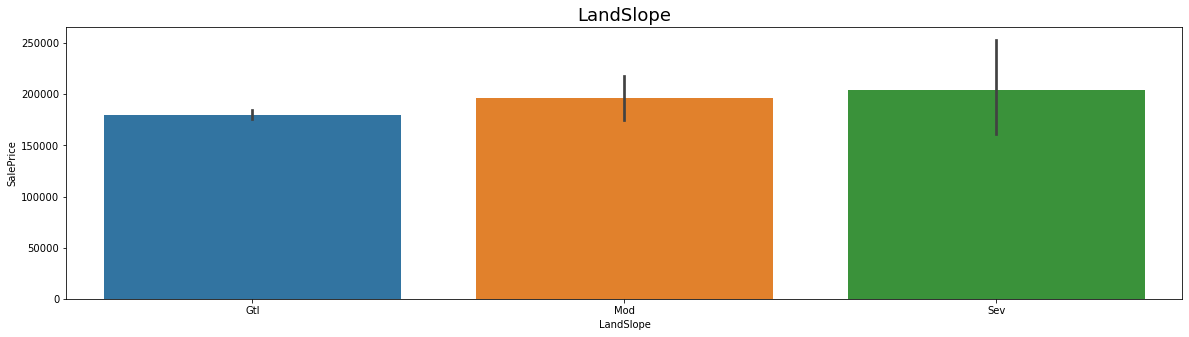

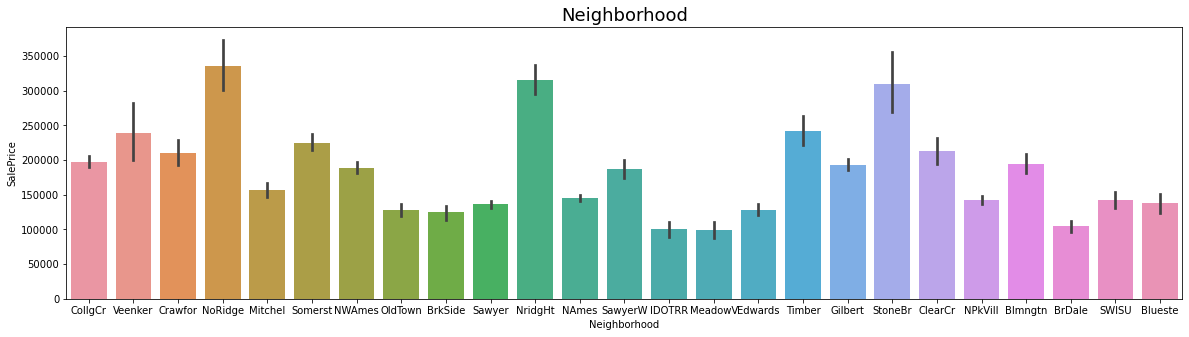

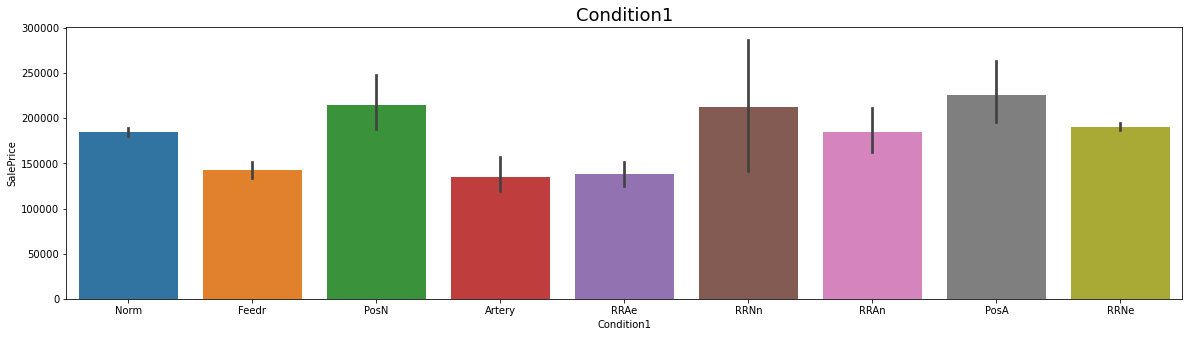

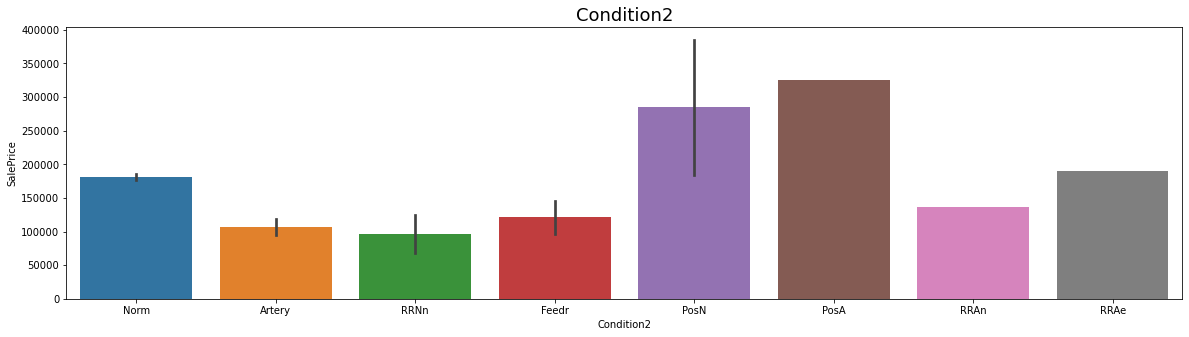

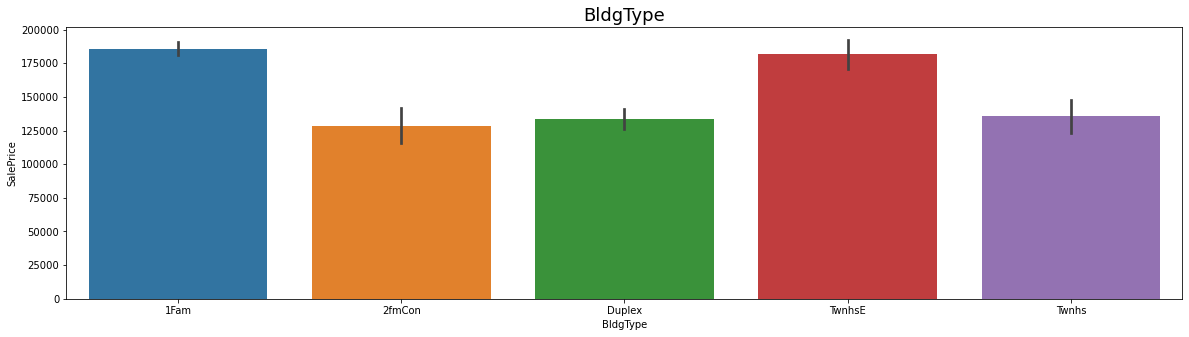

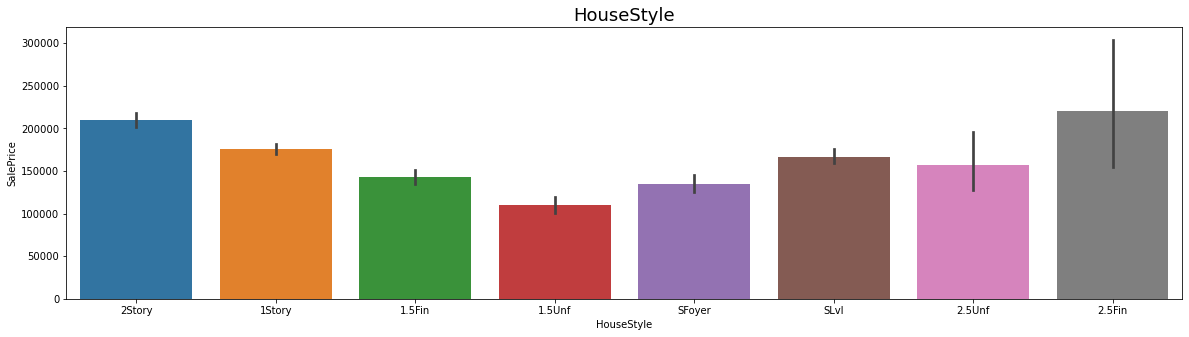

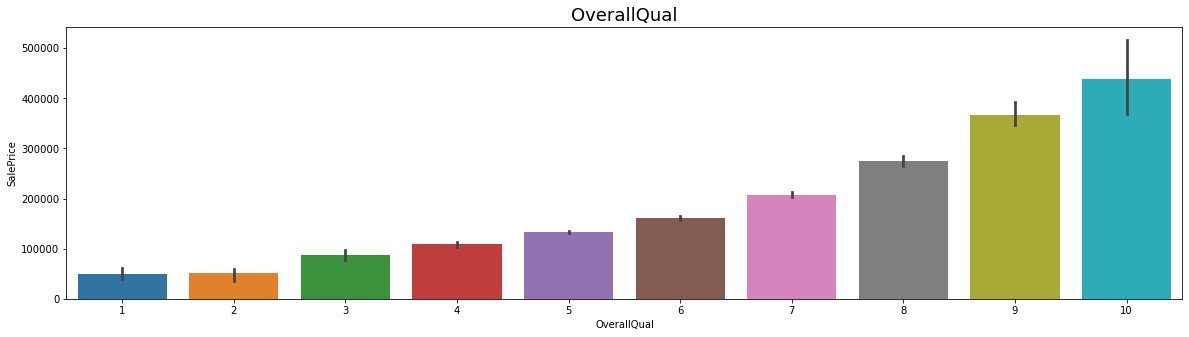

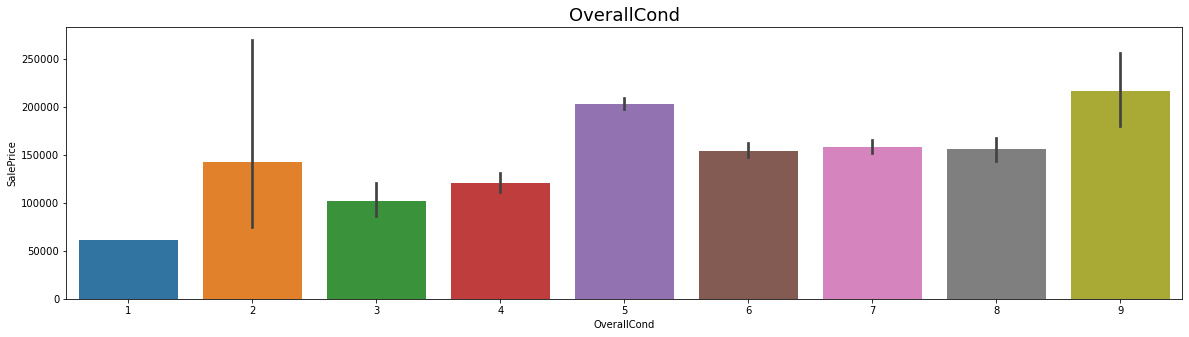

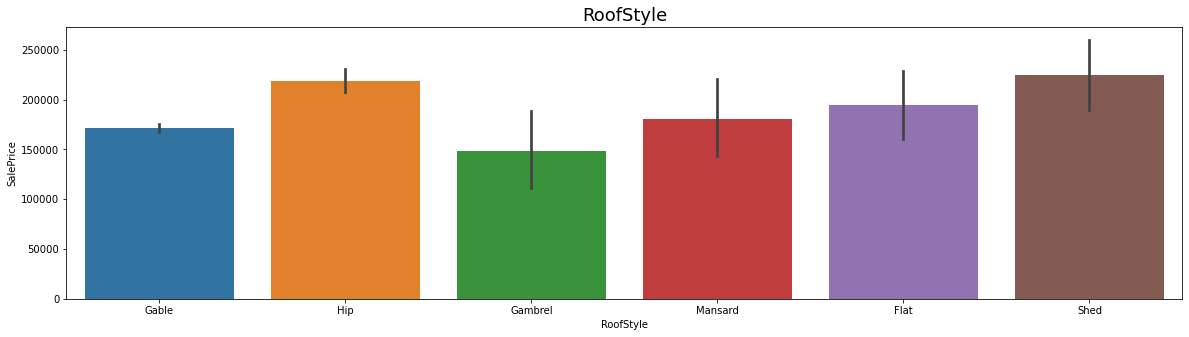

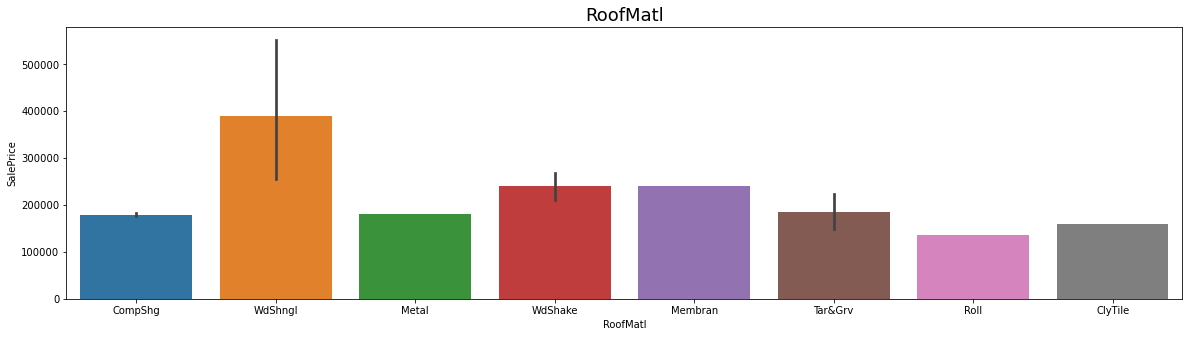

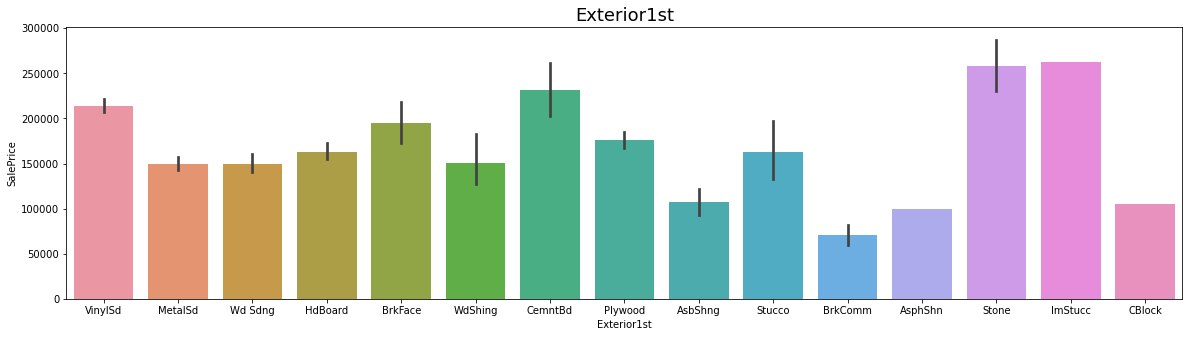

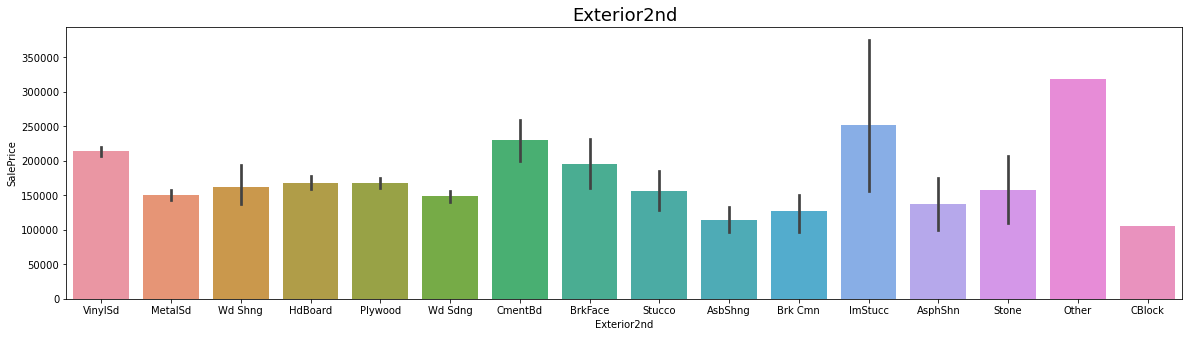

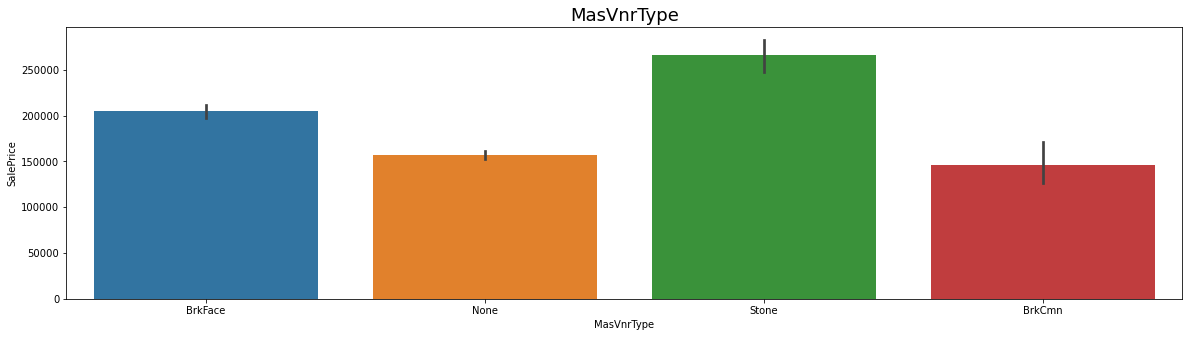

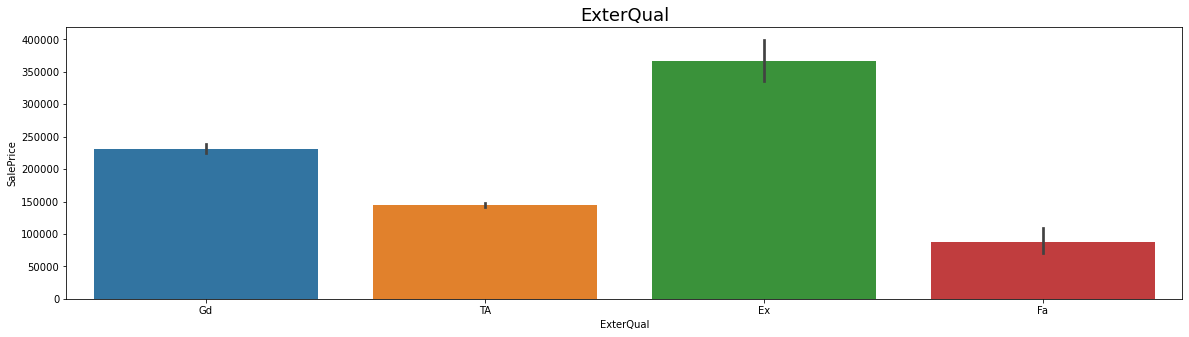

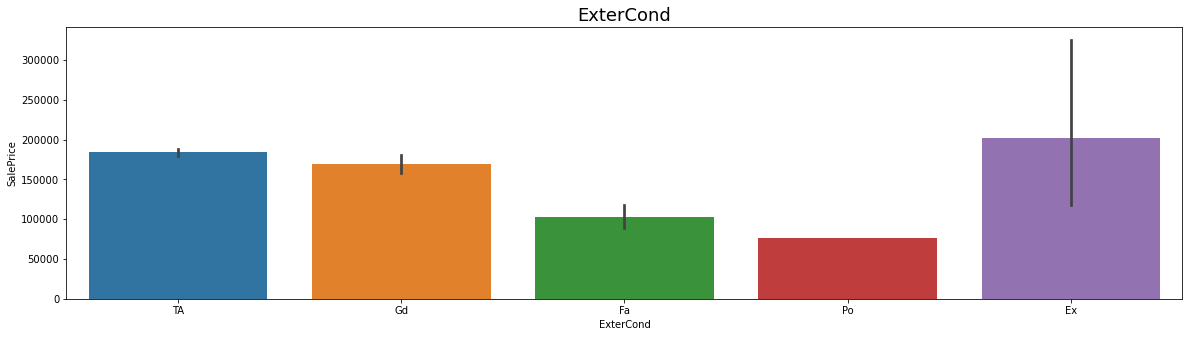

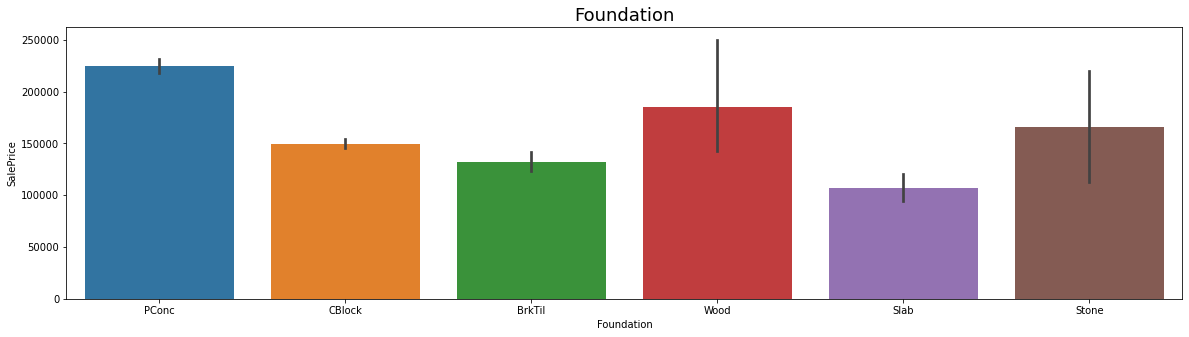

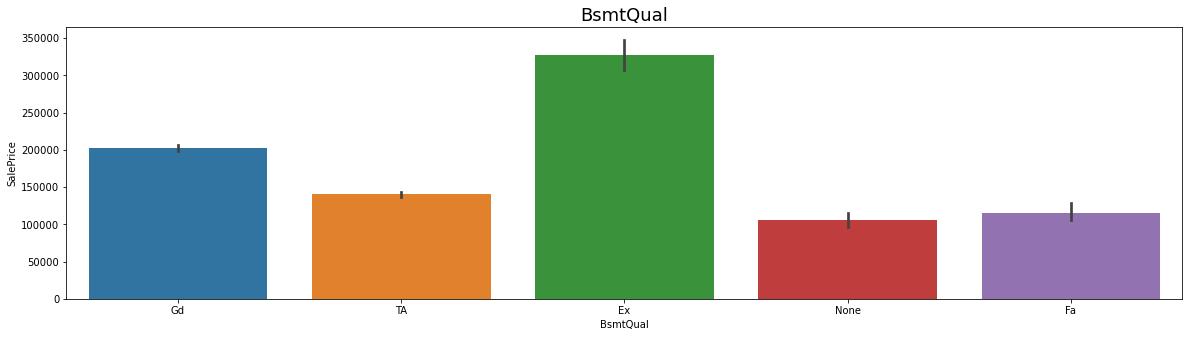

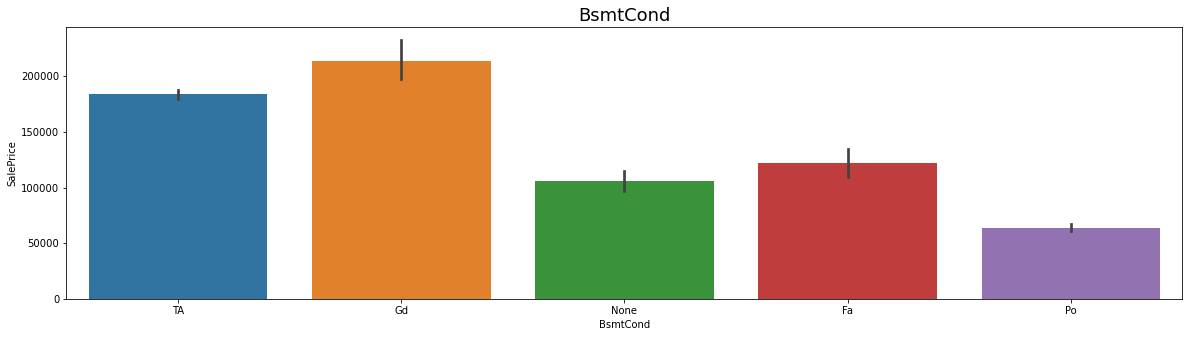

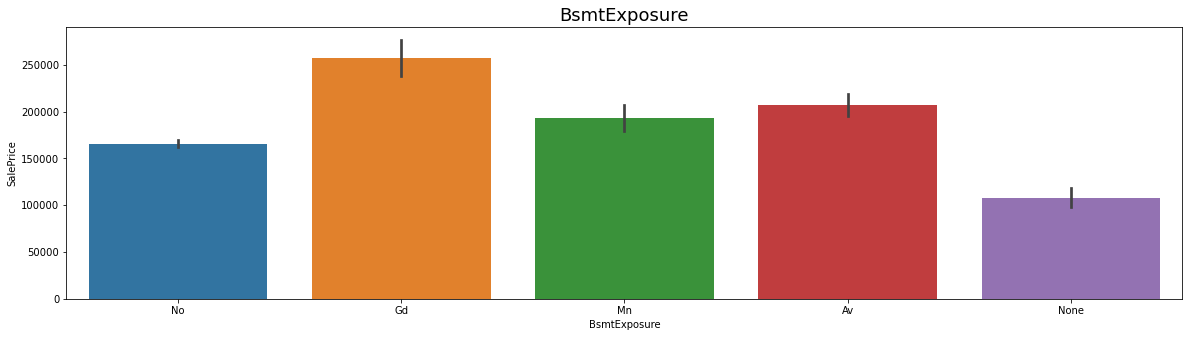

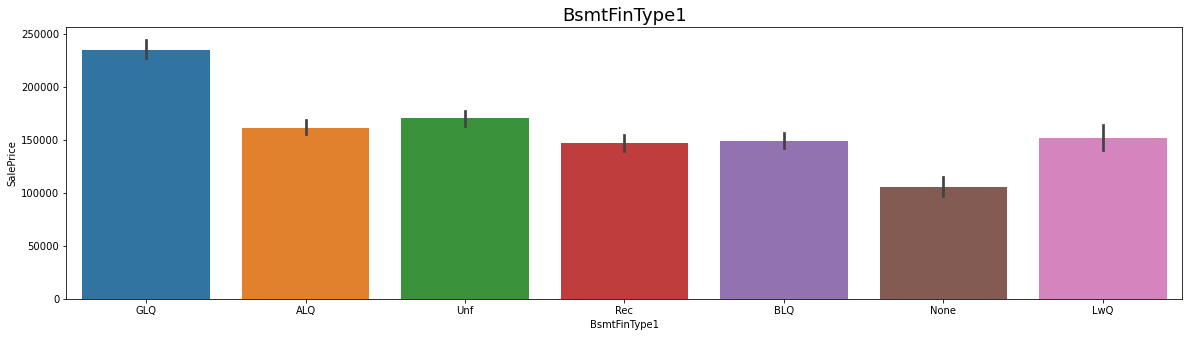

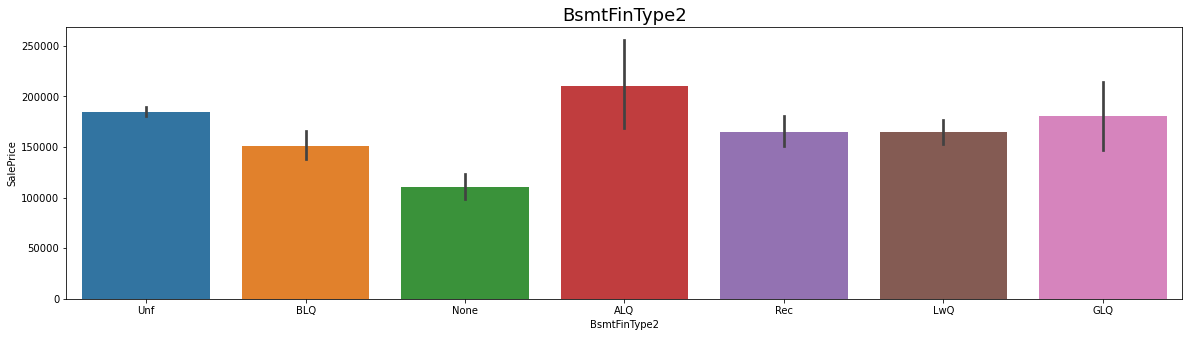

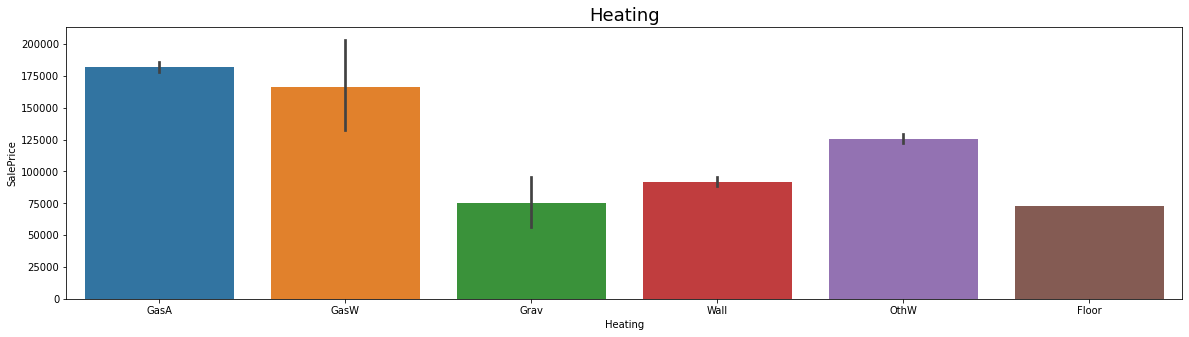

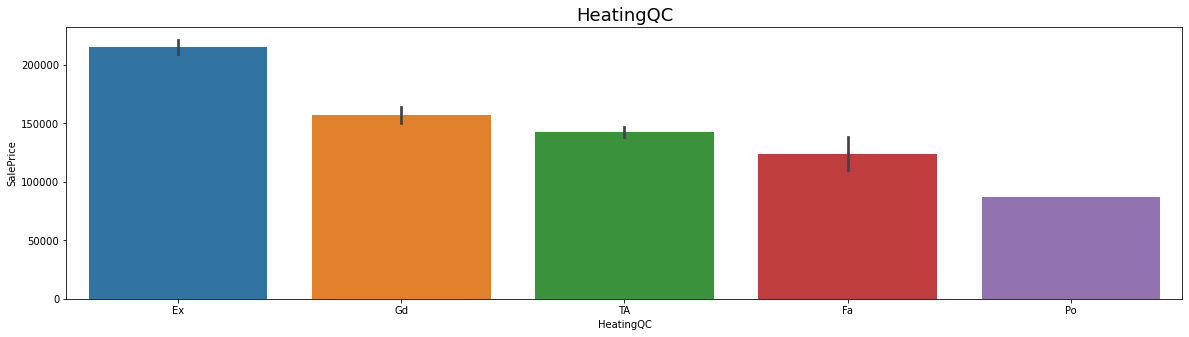

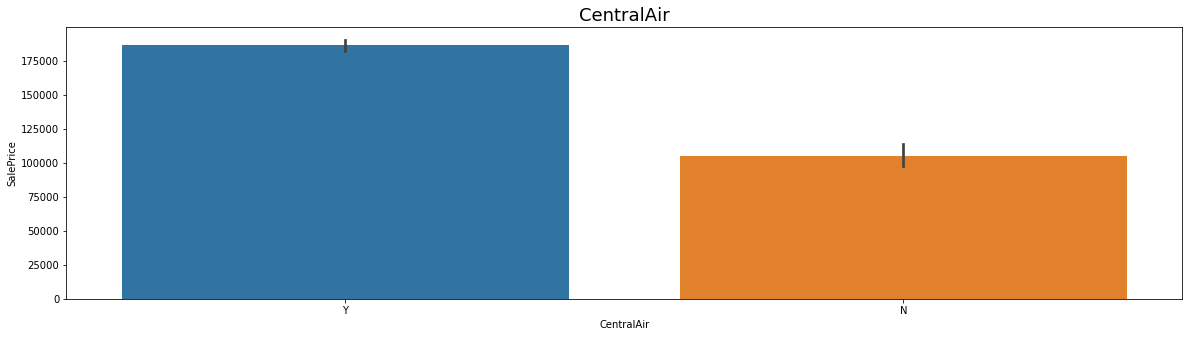

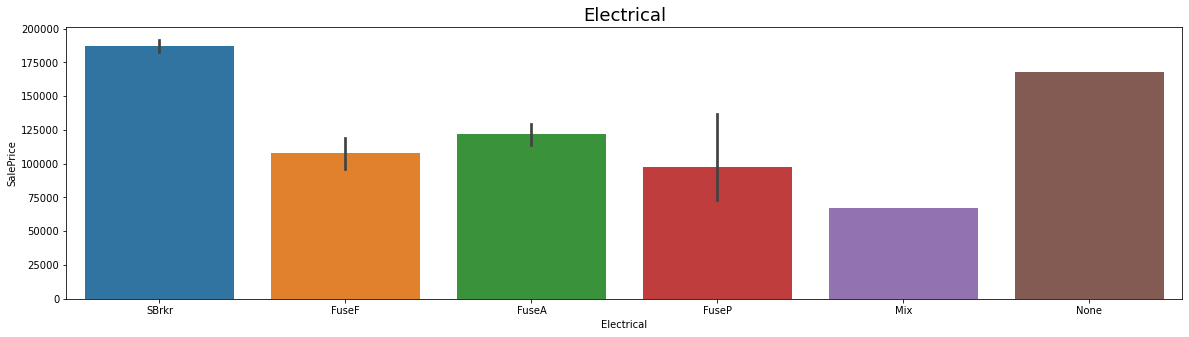

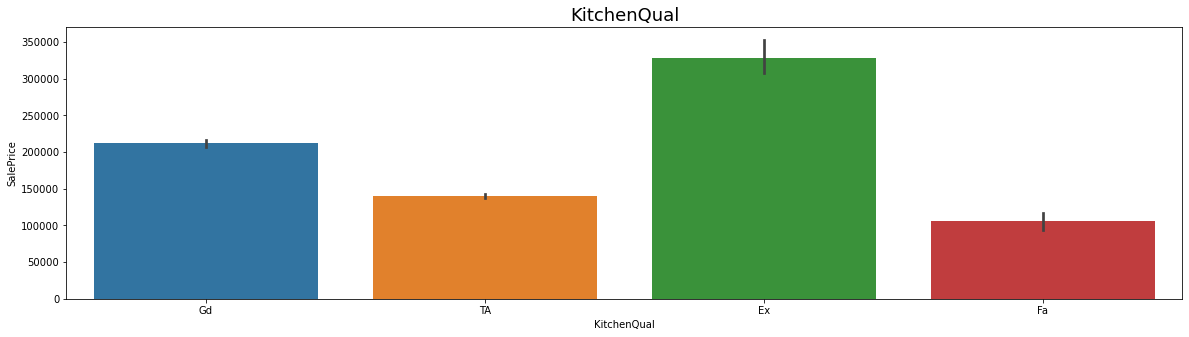

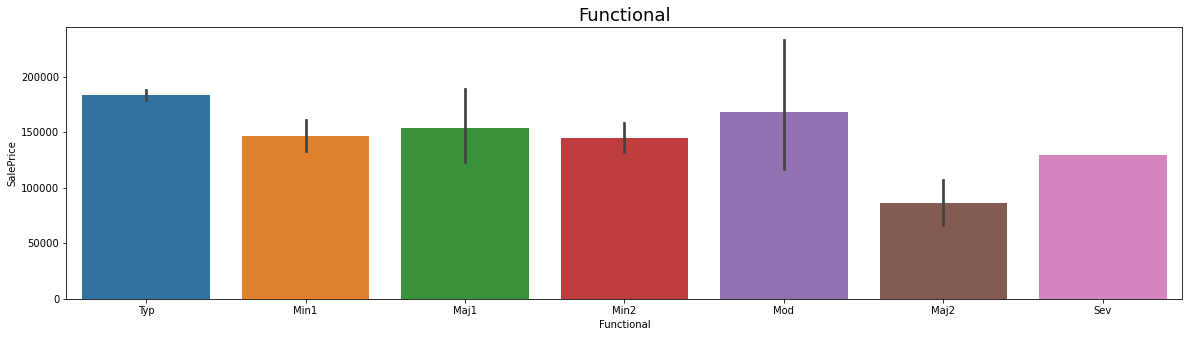

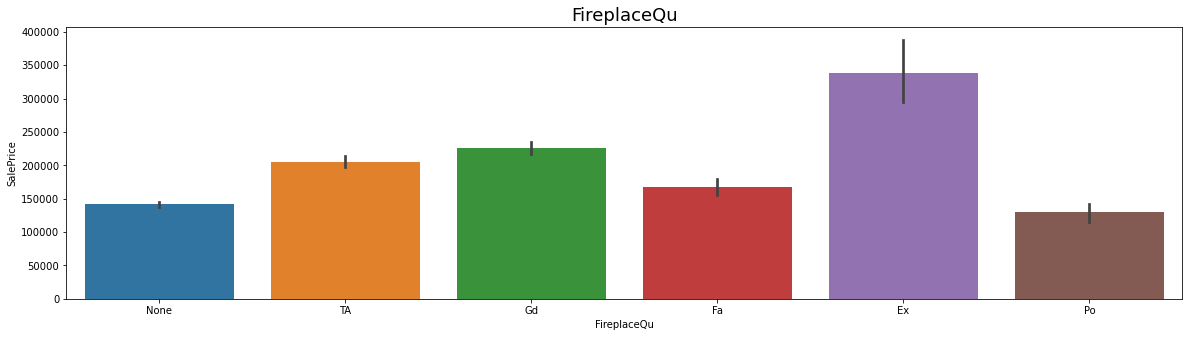

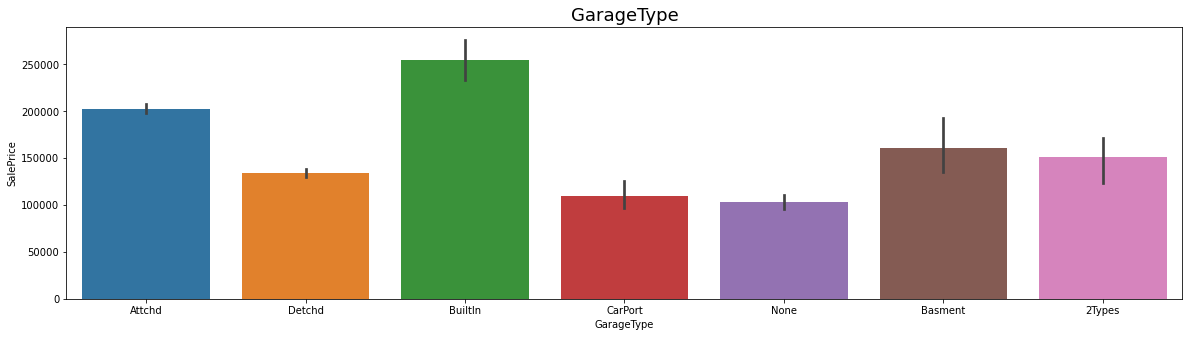

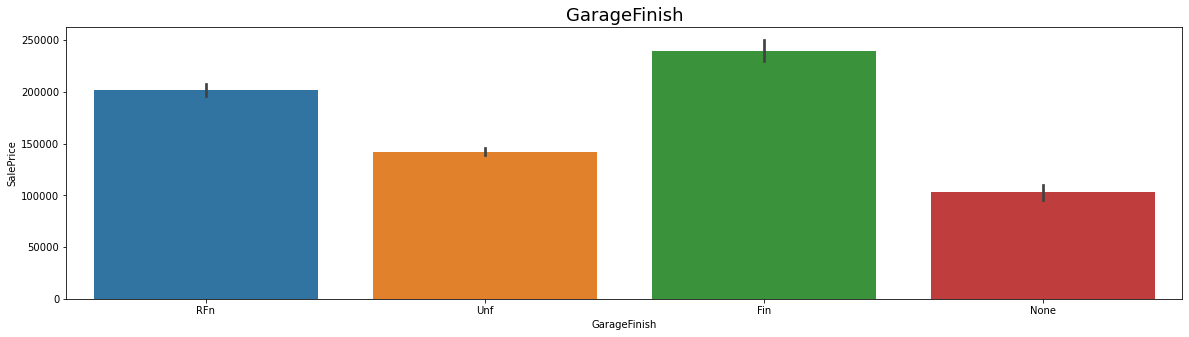

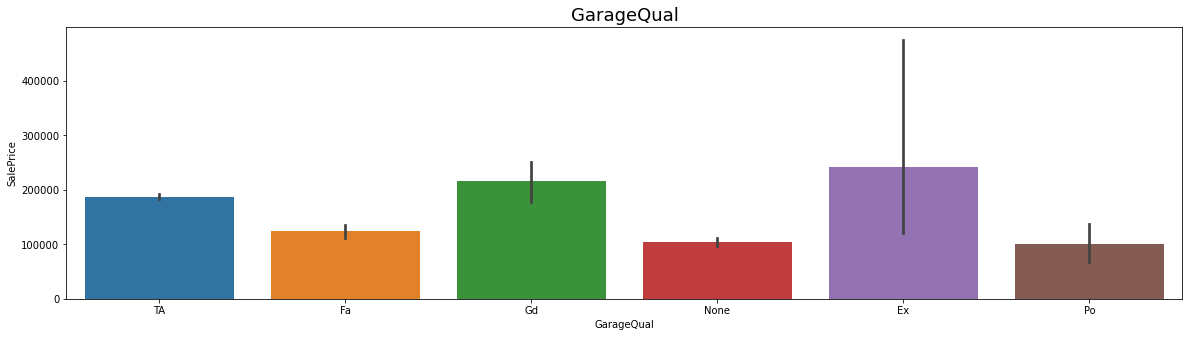

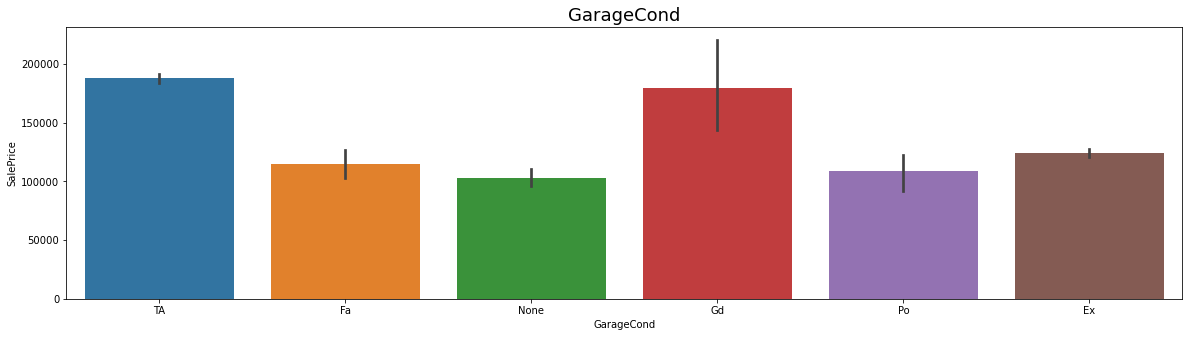

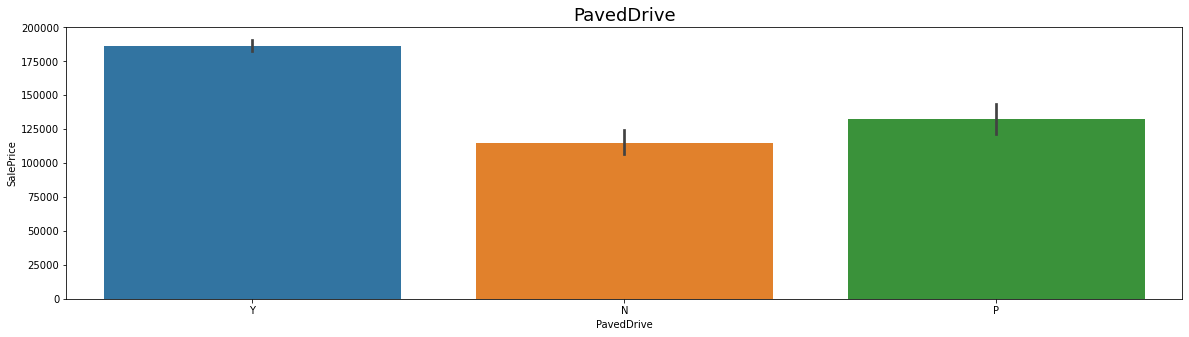

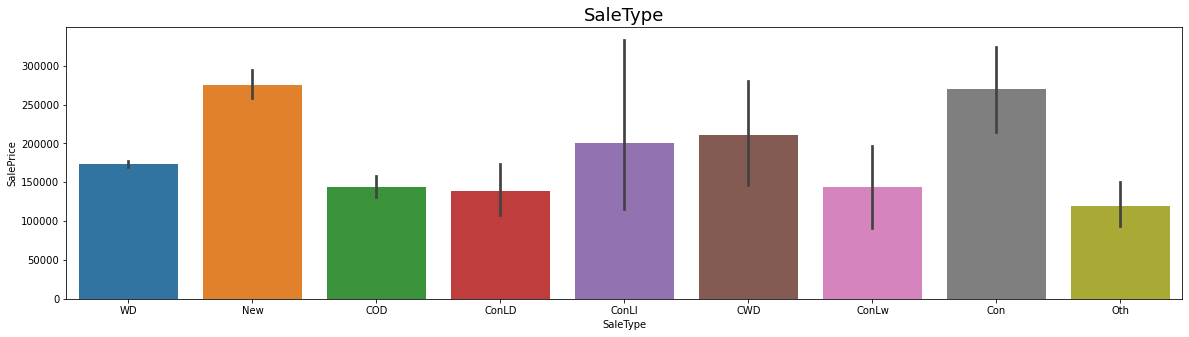

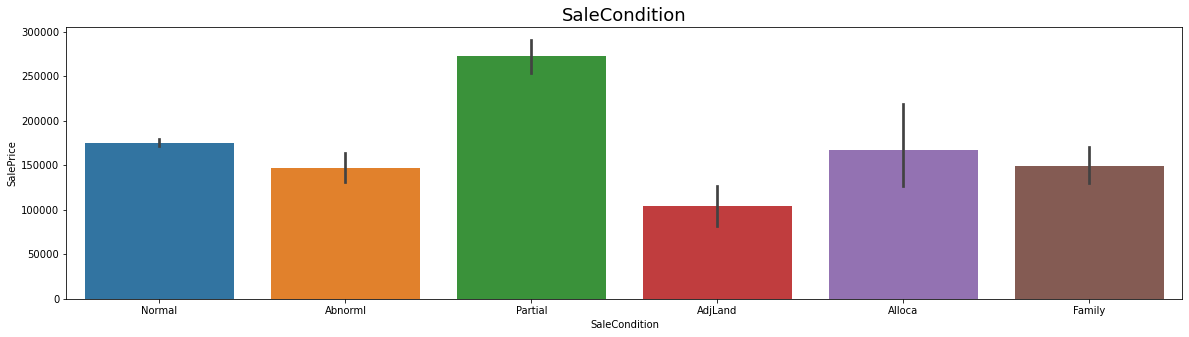

In [337]:
## Visualizing the levels of categorical columns using box plots against target variable
categorical_columns = data.select_dtypes (include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(20,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=col,y=data['SalePrice'],data = data)
    plt.show()

Observations on Categorical columns:

It is  observed from above value counts and bar plots that there is no column with single unique value that can be dropped.

#### Observation with Sales Price :

a) When SaleCondition is Partial i.e. New Homes have relatively high Sales Price 

b) For SaleType New i.e. Home just constructed and sold and houses with Contract 15% Down payment regular terms the price is high

c) Houses with Paved Driveway has higher Price

d)Good or average condition Garage has higher price

e) Excellent & Good Quality Garage houses have higher Sales Price.

f) Houses with Finished garage have higher Sales price.

g)Houses with Built-In (Garage part of house - typically has room above garage) or Garage Attached to home have higher selling price

i)Houses with excellent Fire place quality have higher price.

j)Houses with typical and moderate functionality have high price

k)Houses with Excellent Kitchen Quality have hiher Price.

l)House with Standart Circuits Breakes have higher Price

m)Centally airconditioned houses have high price
       

### Data Preparation

In [338]:
# PropAge -  Property Age from yearsold - yearbuilt
data['Property_Age'] = data['YrSold'] - data['YearBuilt']
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,Y,SBrkr,856.0,854,1710.0,1.0,2,1,3.0,Gd,8,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,Y,SBrkr,1262.0,0,1262.0,0.0,2,0,3.0,TA,6,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,Y,SBrkr,920.0,866,1786.0,1.0,2,1,3.0,Gd,6,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,Y,SBrkr,961.0,756,1717.0,1.0,1,0,3.0,Gd,7,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,Y,SBrkr,1145.0,1053,2198.0,1.0,2,1,4.0,Gd,9,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8


In [339]:
#Dropping columns YrSold & YearBuilt as we have derived column from it
data.drop(['YrSold','YearBuilt'],axis=True,inplace=True)

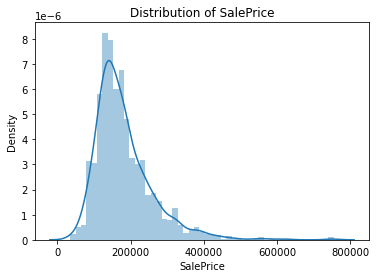

In [340]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(data['SalePrice'])
plt.show()

Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice

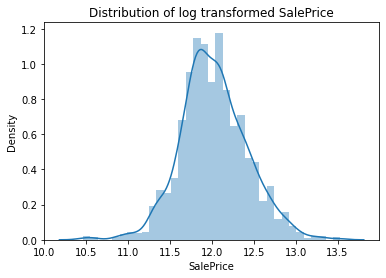

In [341]:
sns.distplot(np.log(data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [269]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(data[categorical_columns], drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,...,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [270]:
## Concatenate  one hot encoded categorical columns with original dataframe
df = pd.concat([data, df_cat_encoded], axis=1)

In [271]:
#Remove columsn which are hot encoded
df.drop(data[categorical_columns],axis=1,inplace=True)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 266 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(13), int64(11), uint8(242)
memory usage: 662.5 KB


### Train Test Split

In [273]:
## X contains all independent variables use to make predictions 'SalePrice' (target variable)
X = df.drop(["SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Property_Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706.0,150.0,856,856.0,854,1710.0,1.0,2,1,3.0,8,0.0,2003.0,2.0,548.0,0,61,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978.0,284.0,1262,1262.0,0,1262.0,0.0,2,0,3.0,6,1.0,1976.0,2.0,460.0,298,0,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486.0,434.0,920,920.0,866,1786.0,1.0,2,1,3.0,6,1.0,2001.0,2.0,608.0,0,42,9,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216.0,540.0,756,961.0,756,1717.0,1.0,1,0,3.0,7,1.0,1998.0,3.0,642.0,0,35,2,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655.0,490.0,1145,1145.0,1053,2198.0,1.0,2,1,4.0,9,1.0,2000.0,3.0,836.0,192,84,12,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [274]:
## Separate out the target variable as y which we want to predict
y = np.log(data['SalePrice']).copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [275]:
#y = data['SalePrice'].copy()

In [276]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) 

In [277]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 265)
(1168,)


In [278]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 265)
(292,)


In [279]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
num_cols = X_train.select_dtypes (include=['int64','float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model Building & Evaluation

We will build  a) Ridge Regression & b) Lasso Regression and complare results of each to select best performing model 

### Ridge Regression

In [342]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [343]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
alpha_optimial = model_cv.best_params_["alpha"]
print("Optimum alpha for ridge is",alpha_optimial )

Optimum alpha for ridge is 7.0


In [344]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

In [345]:
ridge = Ridge(alpha=alpha_optimial)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00272027,  0.0260237 ,  0.02728524, -0.00121472,  0.00123958,
       -0.02628136,  0.06112095,  0.02580799,  0.03854709,  0.08722378,
        0.01073382,  0.01318362,  0.01423867,  0.00901607,  0.00128576,
        0.01460629,  0.0026107 ,  0.02835724,  0.00605845,  0.00869259,
        0.00784566, -0.0016106 , -0.05236409, -0.0638363 ,  0.01586713,
        0.00384505, -0.00253323, -0.01533277,  0.04784364,  0.03743112,
       -0.00827127, -0.00227853, -0.04021757,  0.00971155, -0.05535757,
       -0.01872376, -0.01779331,  0.05868322,  0.03703731,  0.02638868,
       -0.00430319, -0.00900641,  0.03343225, -0.05515113,  0.00530316,
        0.06326596,  0.00017836,  0.02963165, -0.01502676,  0.03872417,
       -0.031327  , -0.02507971, -0.00221269, -0.01238891,  0.02711051,
       -0.00528566, -0.0070797 ,  0.02720756,  0.0288686 , -0.01590609,
        0.07329887, -0.05985652, -0.01443872, -0.02080244, -0.08190091,
       -0.04562586, -0.02846291,  0.01982207, -0.03894049,  0.04

In [346]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.749),
 ('LotFrontage', 0.003),
 ('LotArea', 0.026),
 ('YearRemodAdd', 0.027),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.001),
 ('BsmtUnfSF', -0.026),
 ('TotalBsmtSF', 0.061),
 ('1stFlrSF', 0.026),
 ('2ndFlrSF', 0.039),
 ('GrLivArea', 0.087),
 ('BsmtFullBath', 0.011),
 ('FullBath', 0.013),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.009),
 ('TotRmsAbvGrd', 0.001),
 ('Fireplaces', 0.015),
 ('GarageYrBlt', 0.003),
 ('GarageCars', 0.028),
 ('GarageArea', 0.006),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.008),
 ('MoSold', -0.002),
 ('Property_Age', -0.052),
 ('MSSubClass_30', -0.064),
 ('MSSubClass_40', 0.016),
 ('MSSubClass_45', 0.004),
 ('MSSubClass_50', -0.003),
 ('MSSubClass_60', -0.015),
 ('MSSubClass_70', 0.048),
 ('MSSubClass_75', 0.037),
 ('MSSubClass_80', -0.008),
 ('MSSubClass_85', -0.002),
 ('MSSubClass_90', -0.04),
 ('MSSubClass_120', 0.01),
 ('MSSubClass_160', -0.055),
 ('MSSubClass_180', -0.019),
 ('MSSubClass_190', -0.018),
 ('MSZoning_FV', 0.059),
 ('MSZonin

In [347]:
# ridge regression
lm = Ridge(alpha=7.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9314289675141075
0.8996419484384933


In [348]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13685090093381339


In [349]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [350]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.749
113,OverallQual_9,0.103
77,Neighborhood_StoneBr,0.097
122,OverallCond_9,0.095
10,GrLivArea,0.087
226,Functional_Typ,0.086
212,CentralAir_Y,0.078
137,Exterior1st_BrkFace,0.078
262,SaleCondition_Alloca,0.077
112,OverallQual_8,0.076


In [351]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.749
113,OverallQual_9,0.103
77,Neighborhood_StoneBr,0.097
122,OverallCond_9,0.095
10,GrLivArea,0.087
...,...,...
24,MSSubClass_30,-0.064
91,Condition2_PosN,-0.078
65,Neighborhood_MeadowV,-0.082
107,OverallQual_3,-0.099


### Inference: The model is performing well on trained data but not on test data.Hence Ridge Regression isn't performing well

### Lasso Regression

In [352]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [353]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]

In [354]:
alpha_optimal = model_cv.best_params_["alpha"]
print("Optimum alpha for lasso is",alpha_optimal )

Optimum alpha for lasso is 0.001


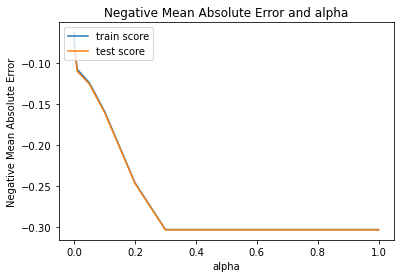

In [355]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [356]:
# At alpha = 0.001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = alpha_optimal
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 3.23335573e-03,  2.58986096e-02,  3.20341594e-02,  0.00000000e+00,
        1.99590130e-02, -7.60612882e-03,  5.04414446e-02,  7.14930152e-03,
        1.46341774e-02,  1.22973777e-01,  1.22797029e-02,  1.00489873e-02,
        9.95645696e-03,  8.28833482e-04,  5.24996608e-04,  2.29635932e-02,
       -0.00000000e+00,  3.24164910e-02,  1.03962912e-02,  8.38655917e-03,
        7.61999220e-03, -6.32476383e-04, -5.29292363e-02, -4.04051395e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.55005336e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.88027508e-02,  0.00000000e+00, -3.68757050e-02, -0.00000000e+00,
       -0.00000000e+00,  7.00119032e-03,  0.00000000e+00,  0.00000000e+00,
       -3.20442905e-02, -0.00000000e+00,  1.30502737e-02, -0.00000000e+00,
        0.00000000e+00,  1.39510480e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.42970499e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [357]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.799),
 ('LotFrontage', 0.003),
 ('LotArea', 0.026),
 ('YearRemodAdd', 0.032),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.02),
 ('BsmtUnfSF', -0.008),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.007),
 ('2ndFlrSF', 0.015),
 ('GrLivArea', 0.123),
 ('BsmtFullBath', 0.012),
 ('FullBath', 0.01),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.001),
 ('TotRmsAbvGrd', 0.001),
 ('Fireplaces', 0.023),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.032),
 ('GarageArea', 0.01),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.008),
 ('MoSold', -0.001),
 ('Property_Age', -0.053),
 ('MSSubClass_30', -0.04),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.036),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.019),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.037),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZoning_FV', 0.007),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0

In [358]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8412584314934693
0.8422588019206687


In [359]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.17157109297962198


In [360]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [361]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.799
1,LotFrontage,0.003
2,LotArea,0.026
3,YearRemodAdd,0.032
4,MasVnrArea,0.000


In [362]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.799
113,OverallQual_9,0.123
10,GrLivArea,0.123
226,Functional_Typ,0.090
212,CentralAir_Y,0.082
...,...,...
108,OverallQual_4,-0.048
23,Property_Age,-0.053
117,OverallCond_4,-0.071
107,OverallQual_3,-0.106


In [363]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.799
113,OverallQual_9,0.123
10,GrLivArea,0.123
226,Functional_Typ,0.090
212,CentralAir_Y,0.082
137,Exterior1st_BrkFace,0.081
61,Neighborhood_Crawfor,0.075
112,OverallQual_8,0.075
77,Neighborhood_StoneBr,0.068
122,OverallCond_9,0.061


In [364]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual_9', 'GrLivArea', 'Functional_Typ', 'CentralAir_Y', 'Exterior1st_BrkFace', 'Neighborhood_Crawfor', 'OverallQual_8', 'Neighborhood_StoneBr', 'OverallCond_9', 'Neighborhood_NridgHt', 'TotalBsmtSF', 'Condition1_Norm', 'Neighborhood_Somerst', 'SaleCondition_Partial', 'MSSubClass_70', 'LotConfig_CulDSac', 'GarageCars', 'YearRemodAdd', 'BsmtCond_TA', 'Foundation_PConc', 'BsmtExposure_Gd', 'OverallCond_7', 'LotArea', 'Neighborhood_BrkSide', 'Fireplaces', 'SaleCondition_Normal', 'GarageType_Attchd', 'BsmtFinSF1', 'OverallCond_8', 'OverallQual_7', 'PavedDrive_Y', '2ndFlrSF', 'LandContour_HLS', 'GarageType_Detchd', 'LotShape_IR2', 'BsmtFullBath', 'BsmtCond_Gd', 'FullBath', 'GarageArea', 'HalfBath', 'BsmtFinType1_GLQ', 'WoodDeckSF', 'GarageCond_TA', 'OpenPorchSF', 'OverallQual_10', 'MSZoning_FV', 'FireplaceQu_Gd', '1stFlrSF', 'Exterior2nd_Wd Sdng', 'Exterior1st_MetalSd', 'LotFrontage', 'Neighborhood_NoRidge', 'BedroomAbvGr', 'ExterCond_TA', 'TotRmsAbvGrd', 'MoSold', 'Heat

### Observation:
The model performance by Lasso Regression was better in terms of R2 values of Train and Test than Ridge.

It is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.

Equation can be formulated using the features and coefficients obtained by Lasso

### Inference from the Model:

Some of features which affects the price of the houses are as follows:

    a) The houses with excellent overall material and finish of the house have higher selleing price.
    b) Above grade (ground) living area square feet is imporatnt feature determining the price of the house.Higher the value higher the price
    c) Houses with typical functionalitiy have higher Sales Price.
    d) If the house is centally air-conditioned then Sales Price is high.
    e) If Exterior covering on house is brick face then price is more.
    f) If the overall condition of house is excelent then Sales price is high.
    
The higher values of negative coeeficients suggest a decrease in sale value.

Some feature like PropertyAge,MSSubClass,Overall Condition is below Average suggest decrase in price


When the market value of the property is lower than the Predicted Sale Price, its the time to buy.